<a href="https://colab.research.google.com/github/bathicodes/Augmentic/blob/main/Per_letter_folder_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Research/sEMG research/Datasets/ms3sbpbrgp-1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: ms3sbpbrgp-1/HCMYO-A/data/S01/p/s_quat_34706.txt  
  inflating: __MACOSX/ms3sbpbrgp-1/HCMYO-A/data/S01/p/._s_quat_34706.txt  
  inflating: ms3sbpbrgp-1/HCMYO-A/data/S01/p/trace_34674.txt  
  inflating: __MACOSX/ms3sbpbrgp-1/HCMYO-A/data/S01/p/._trace_34674.txt  
  inflating: ms3sbpbrgp-1/HCMYO-A/data/S01/p/s_quat_34712.txt  
  inflating: __MACOSX/ms3sbpbrgp-1/HCMYO-A/data/S01/p/._s_quat_34712.txt  
  inflating: ms3sbpbrgp-1/HCMYO-A/data/S01/p/trace_34660.txt  
  inflating: __MACOSX/ms3sbpbrgp-1/HCMYO-A/data/S01/p/._trace_34660.txt  
  inflating: ms3sbpbrgp-1/HCMYO-A/data/S01/p/trace_34648.txt  
  inflating: __MACOSX/ms3sbpbrgp-1/HCMYO-A/data/S01/p/._trace_34648.txt  
  inflating: ms3sbpbrgp-1/HCMYO-A/data/S01/p/trace_14201.txt  
  inflating: __MACOSX/ms3sbpbrgp-1/HCMYO-A/data/S01/p/._trace_14201.txt  
  inflating: ms3sbpbrgp-1/HCMYO-A/data/S01/p/trace_14215.txt  
  inflating: __MACOSX/ms3sbpbrgp-1/HCMYO-A/data/S01/p/._trac

In [3]:
# define data folder paths 
import os

parent_folder = "/content/ms3sbpbrgp-1"
subjects_path = "/content/ms3sbpbrgp-1/HCMYO-A/data"


os.mkdir('/content/ms3sbpbrgp-1/HCMYO-A/data/S01_merged')
os.mkdir('/content/ms3sbpbrgp-1/HCMYO-A/data/S02_merged')
os.mkdir('/content/ms3sbpbrgp-1/HCMYO-A/data/S03_merged')

In [4]:
from pathlib import Path
import pandas as pd
import os


def csv_combine(folder_path, save_path):

  file_array = []

  # read all the files in a specific path and added to an array
  file_path = Path(folder_path)
  for file in file_path.iterdir():
    if file.is_file():
      if file.name[0].lower() == "t":
        os.remove(file)
      else:
        file_array.append(file)

  # read each file from the array and combine them together
  df = pd.DataFrame()
  for i in file_array:
    data = pd.read_csv(i, delimiter=',',header=None)
    df = pd.concat([df, data], axis=0)

  save_path = save_path + '/' + f"{file.parent.stem}.csv"
  df.to_csv(save_path, index=False)

In [5]:
csv_combine('/content/ms3sbpbrgp-1/HCMYO-A/data/S01/0', '/content/ms3sbpbrgp-1/HCMYO-A/data/S01_merged')

In [6]:
# go through all the files of the subject s01 and create the final csv

folders = ["0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

for i in folders:
  csv_combine(f'/content/ms3sbpbrgp-1/HCMYO-A/data/S01/{i}', '/content/ms3sbpbrgp-1/HCMYO-A/data/S01_merged')
  csv_combine(f'/content/ms3sbpbrgp-1/HCMYO-A/data/S02/{i}', '/content/ms3sbpbrgp-1/HCMYO-A/data/S02_merged')
  csv_combine(f'/content/ms3sbpbrgp-1/HCMYO-A/data/S03/{i}', '/content/ms3sbpbrgp-1/HCMYO-A/data/S03_merged')

In [109]:
# creating a method to assign dataframes for the each letter of the participants
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def analyzer(file_1, file_2, file_3):

  P1 = pd.read_csv(file_1)
  P2 = pd.read_csv(file_2)
  P3 = pd.read_csv(file_3)


  P1 = P1.drop(P1.columns[8], axis="columns")
  P2 = P2.drop(P2.columns[8], axis="columns")
  P3 = P3.drop(P3.columns[8], axis="columns")

  mean_dict = {
      "P1": P1.mean(),
      "P2": P2.mean(),
      "P3": P3.mean(),
  }

  std_dict = {
      "P1": P1.std(),
      "P2": P2.std(),
      "P3": P3.std(),
  }

  variance_dict = {
      "P1": P1.var(),
      "P2": P2.var(),
      "P3": P3.var(),
  }

  min_dict = {
      "P1": P1.min(),
      "P2": P2.min(),
      "P3": P3.min(),
  }

  max_dict = {
      "P1": P1.max(),
      "P2": P2.max(),
      "P3": P3.max(),
  }

  # plot mean diagram
  array_1 = np.array(mean_dict["P1"])
  array_2 = np.array(mean_dict["P2"])
  array_3 = np.array(mean_dict["P3"])

  array_4 = np.array(std_dict["P1"])
  array_5 = np.array(std_dict["P2"])
  array_6 = np.array(std_dict["P3"])

  array_7 = np.array(variance_dict["P1"])
  array_8 = np.array(variance_dict["P2"])
  array_9 = np.array(variance_dict["P3"])

  array_10 = np.array(min_dict["P1"])
  array_11 = np.array(min_dict["P2"])
  array_12 = np.array(min_dict["P3"])

  array_13 = np.array(max_dict["P1"])
  array_14 = np.array(max_dict["P2"])
  array_15 = np.array(max_dict["P3"])

  x = np.arange(len(array_1.T))

  plt.figure(figsize=(30,6))

  # setting up main title (Character name)
  name = Path(file_1)
  plt.suptitle(f"{name.name}", fontweight='extra bold', fontsize='xx-large')

  # MEAN
  plt.subplot(1,5,1)
  y1 = array_1.T
  y2 = array_2.T
  y3 = array_3.T
  width = 0.2

  plt.bar(x-0.2, y1, width, color='cyan')
  plt.bar(x, y2, width, color='orange')
  plt.bar(x+0.2, y3, width, color='green')
  plt.xticks(x, ['E1', 'E2', 'E3', 'E4', 'E5', 'E6','E7', 'E8'])
  plt.xlabel("Electrodes")
  plt.ylabel("Electrode values")
  plt.title("MEAN")
  plt.legend(["Participant 1", "Participants 2", "Participants 3"])

  # STD
  plt.subplot(1,5,2)
  y4 = array_4.T
  y5 = array_5.T
  y6 = array_6.T
  width = 0.2

  plt.bar(x-0.2, y4, width, color='cyan')
  plt.bar(x, y5, width, color='orange')
  plt.bar(x+0.2, y6, width, color='green')
  plt.xticks(x, ['E1', 'E2', 'E3', 'E4', 'E5', 'E6','E7', 'E8'])
  plt.xlabel("Electrodes")
  plt.title("STD")
  # plt.legend(["Participant 1", "Participants 2", "Participants 3"])

  # VARIANCE
  plt.subplot(1,5,3)
  y7 = array_7.T
  y8 = array_8.T
  y9 = array_9.T
  width = 0.2

  plt.bar(x-0.2, y7, width, color='cyan')
  plt.bar(x, y8, width, color='orange')
  plt.bar(x+0.2, y9, width, color='green')
  plt.xticks(x, ['E1', 'E2', 'E3', 'E4', 'E5', 'E6','E7', 'E8'])
  plt.xlabel("Electrodes")
  plt.title("VARIANCE")
  # plt.legend(["Participant 1", "Participants 2", "Participants 3"])

  # MIN
  plt.subplot(1,5,4)
  y10 = array_10.T
  y11 = array_11.T
  y12 = array_12.T
  width = 0.2

  plt.bar(x-0.2, y10, width, color='cyan')
  plt.bar(x, y11, width, color='orange')
  plt.bar(x+0.2, y12, width, color='green')
  plt.xticks(x, ['E1', 'E2', 'E3', 'E4', 'E5', 'E6','E7', 'E8'])
  plt.xlabel("Electrodes")
  plt.title("MIN")
  # plt.legend(["Participant 1", "Participants 2", "Participants 3"])

  # MAX
  plt.subplot(1,5,5)
  y13 = array_13.T
  y14 = array_14.T
  y15 = array_15.T
  width = 0.2

  plt.bar(x-0.2, y13, width, color='cyan')
  plt.bar(x, y14, width, color='orange')
  plt.bar(x+0.2, y15, width, color='green')
  plt.xticks(x, ['E1', 'E2', 'E3', 'E4', 'E5', 'E6','E7', 'E8'])
  plt.xlabel("Electrodes")
  plt.title("MAX")
  # plt.legend(["Participant 1", "Participants 2", "Participants 3"])


  plt.show()



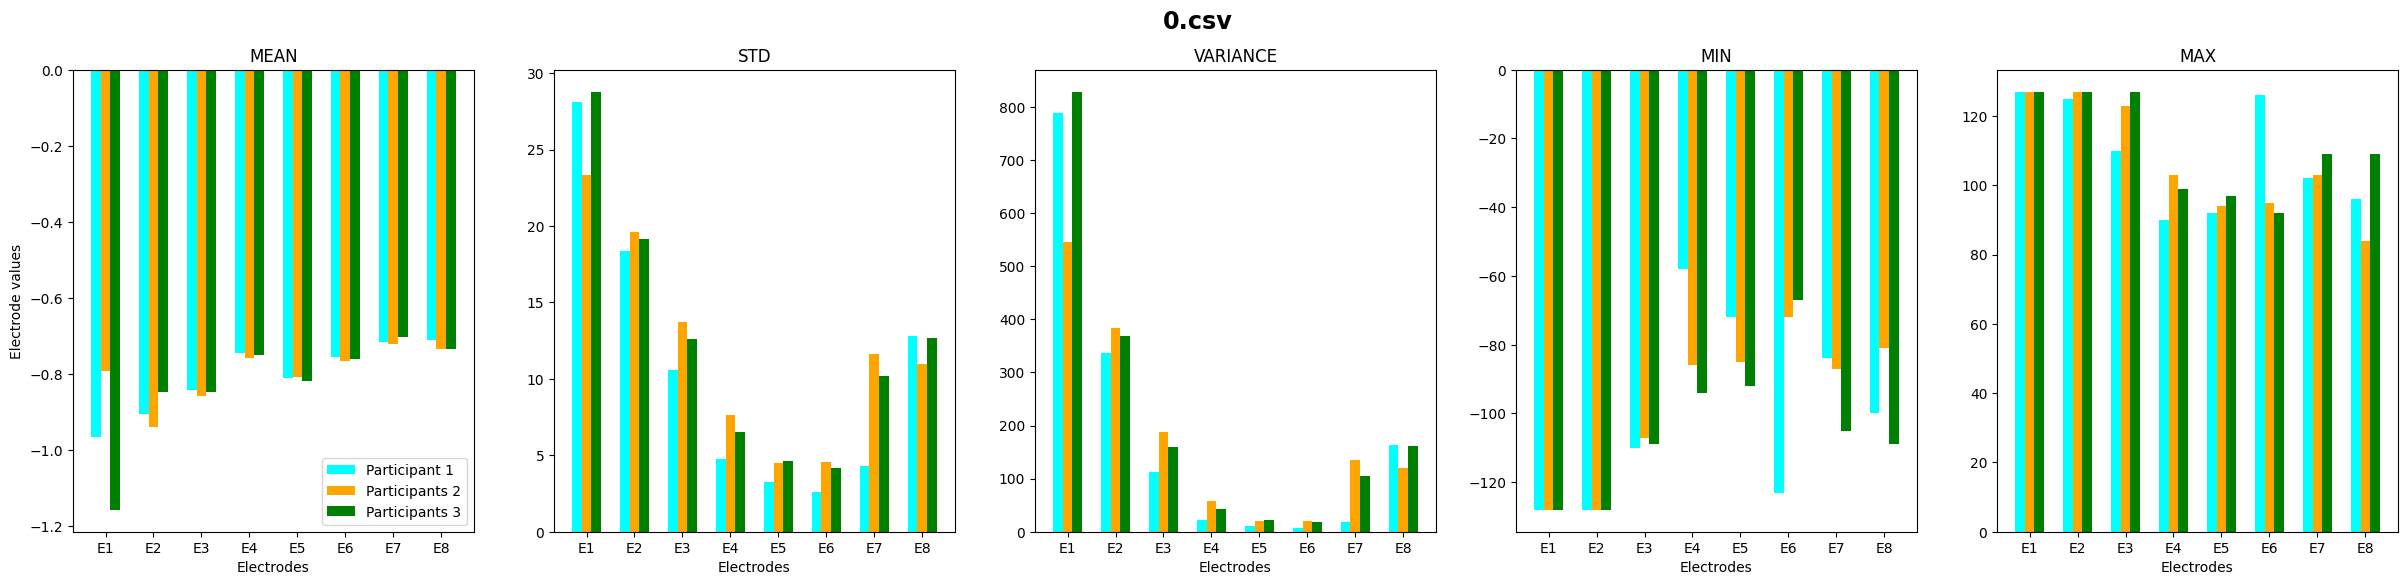

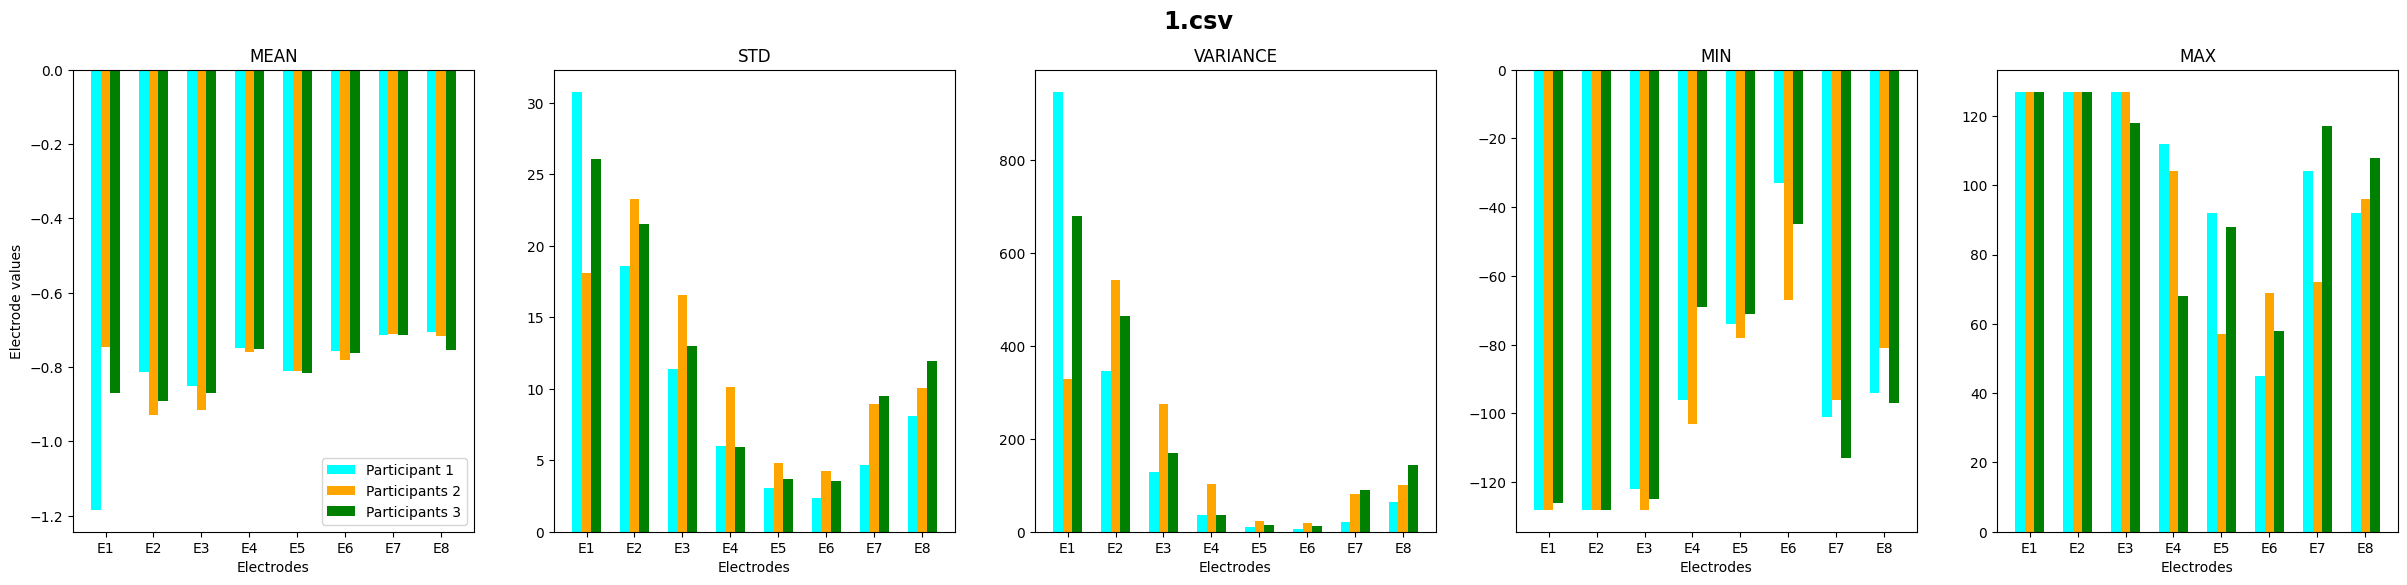

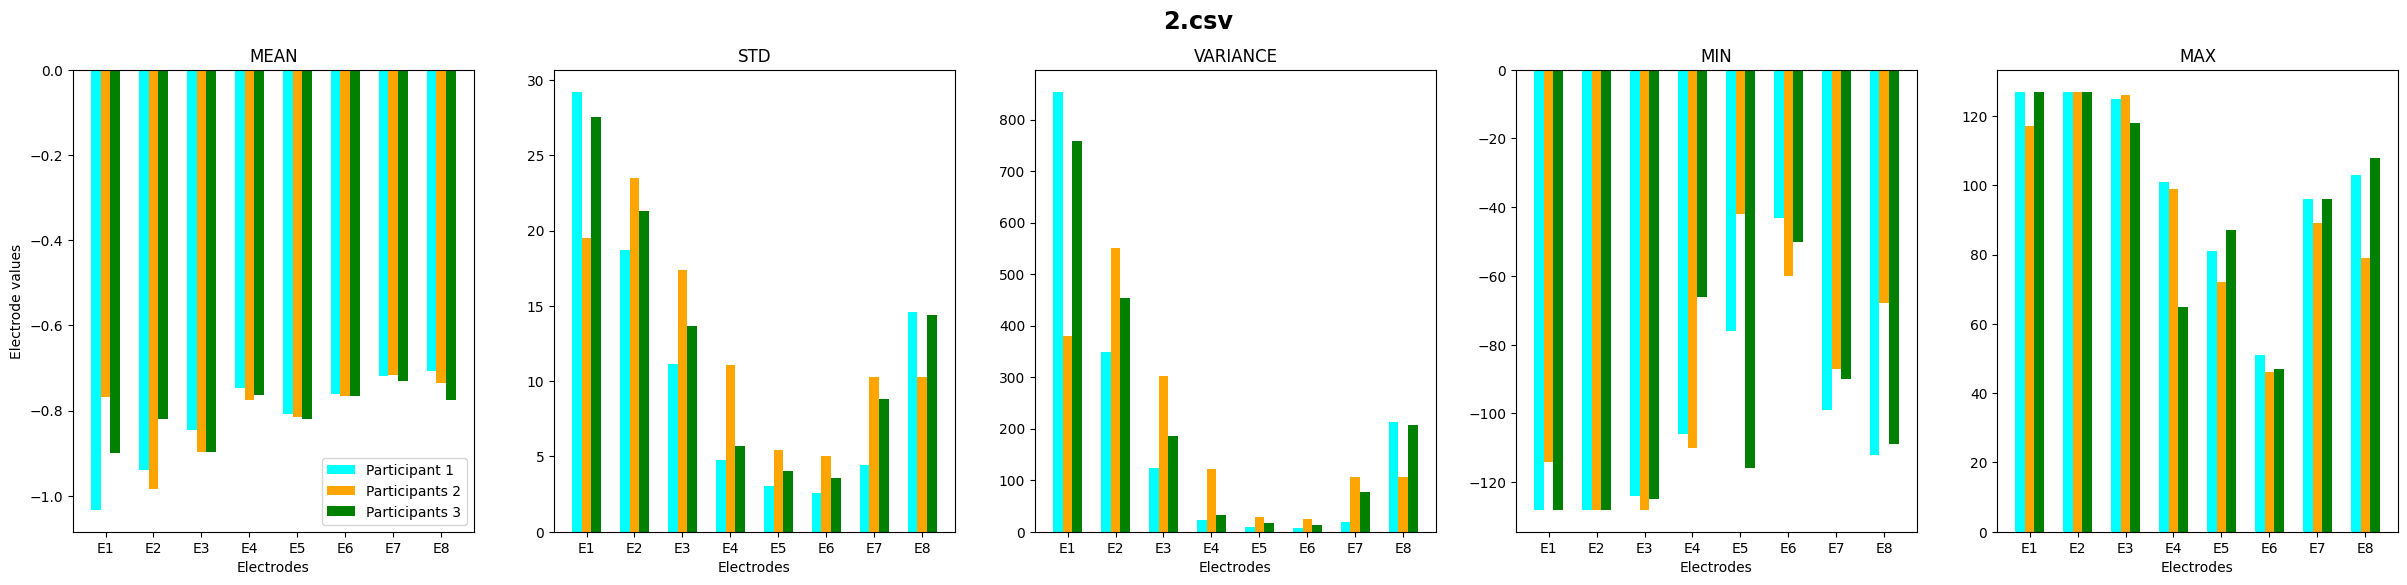

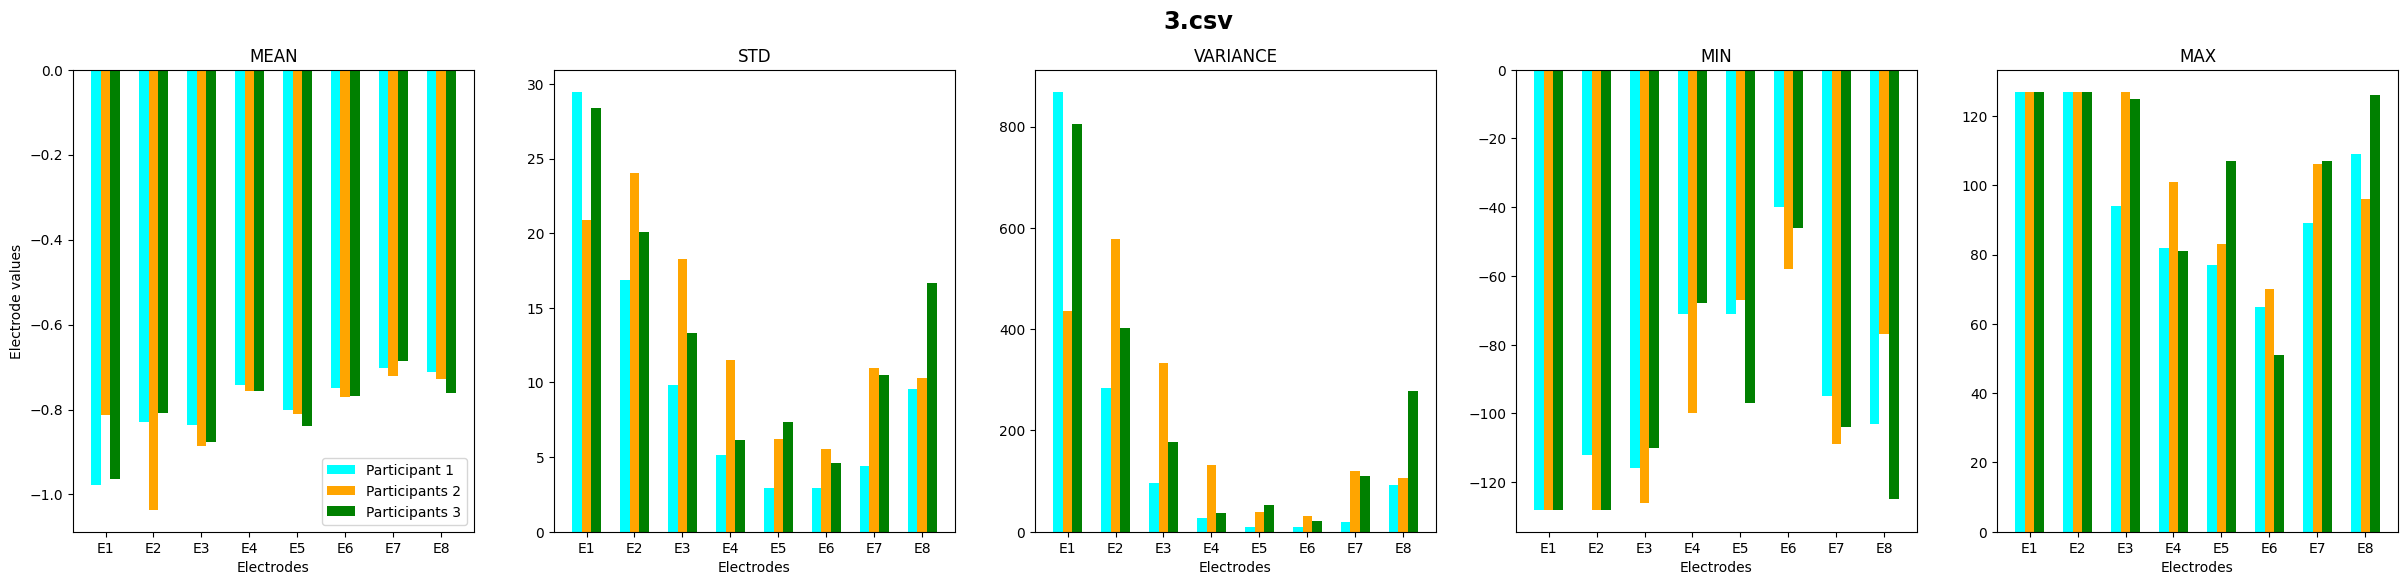

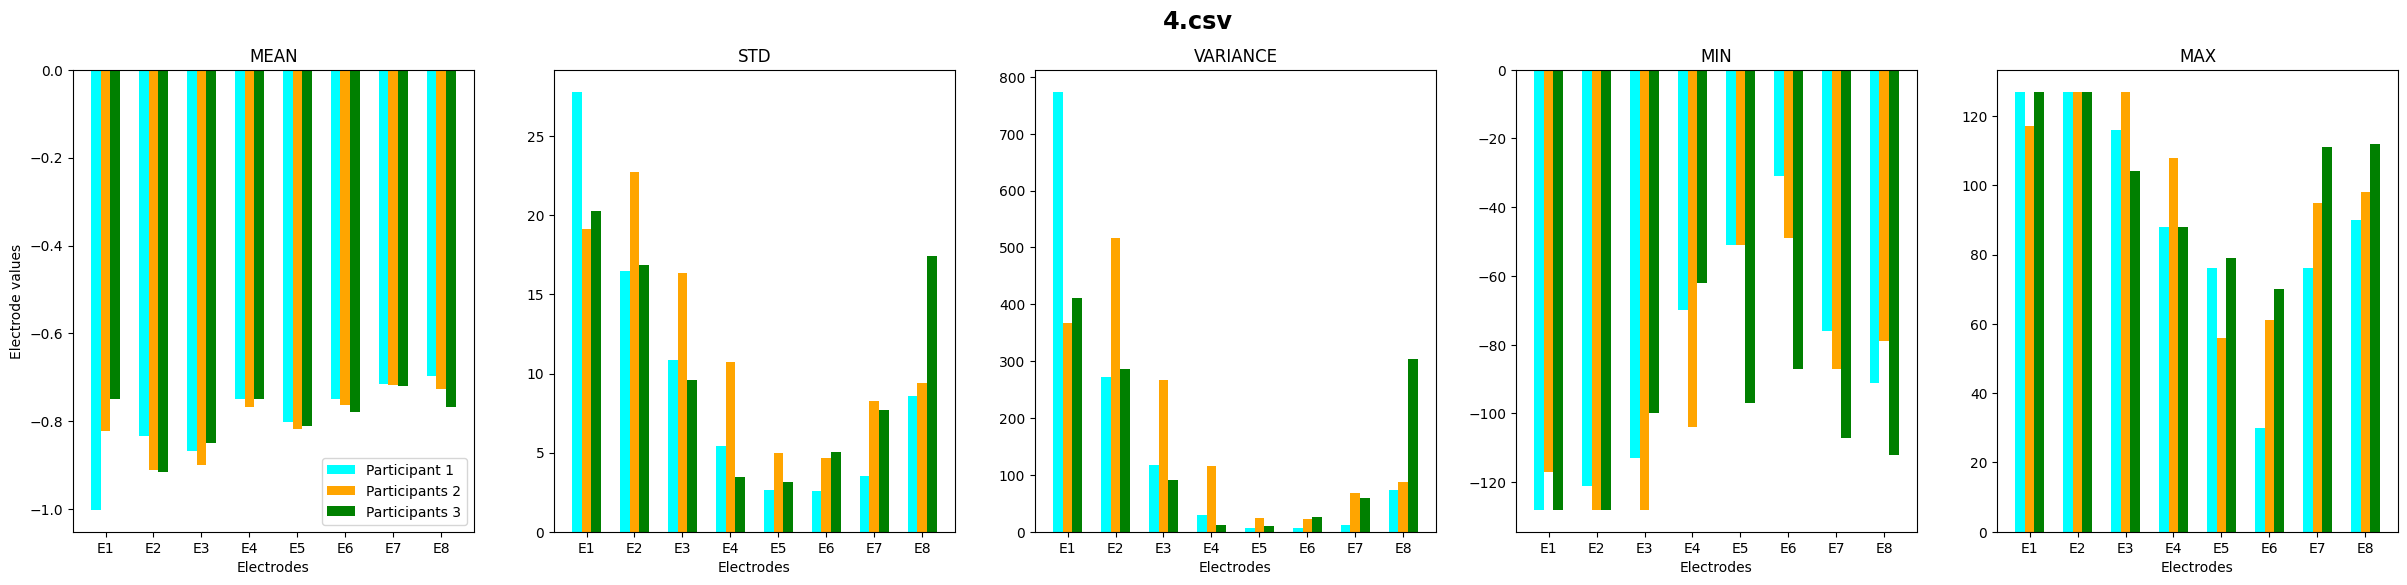

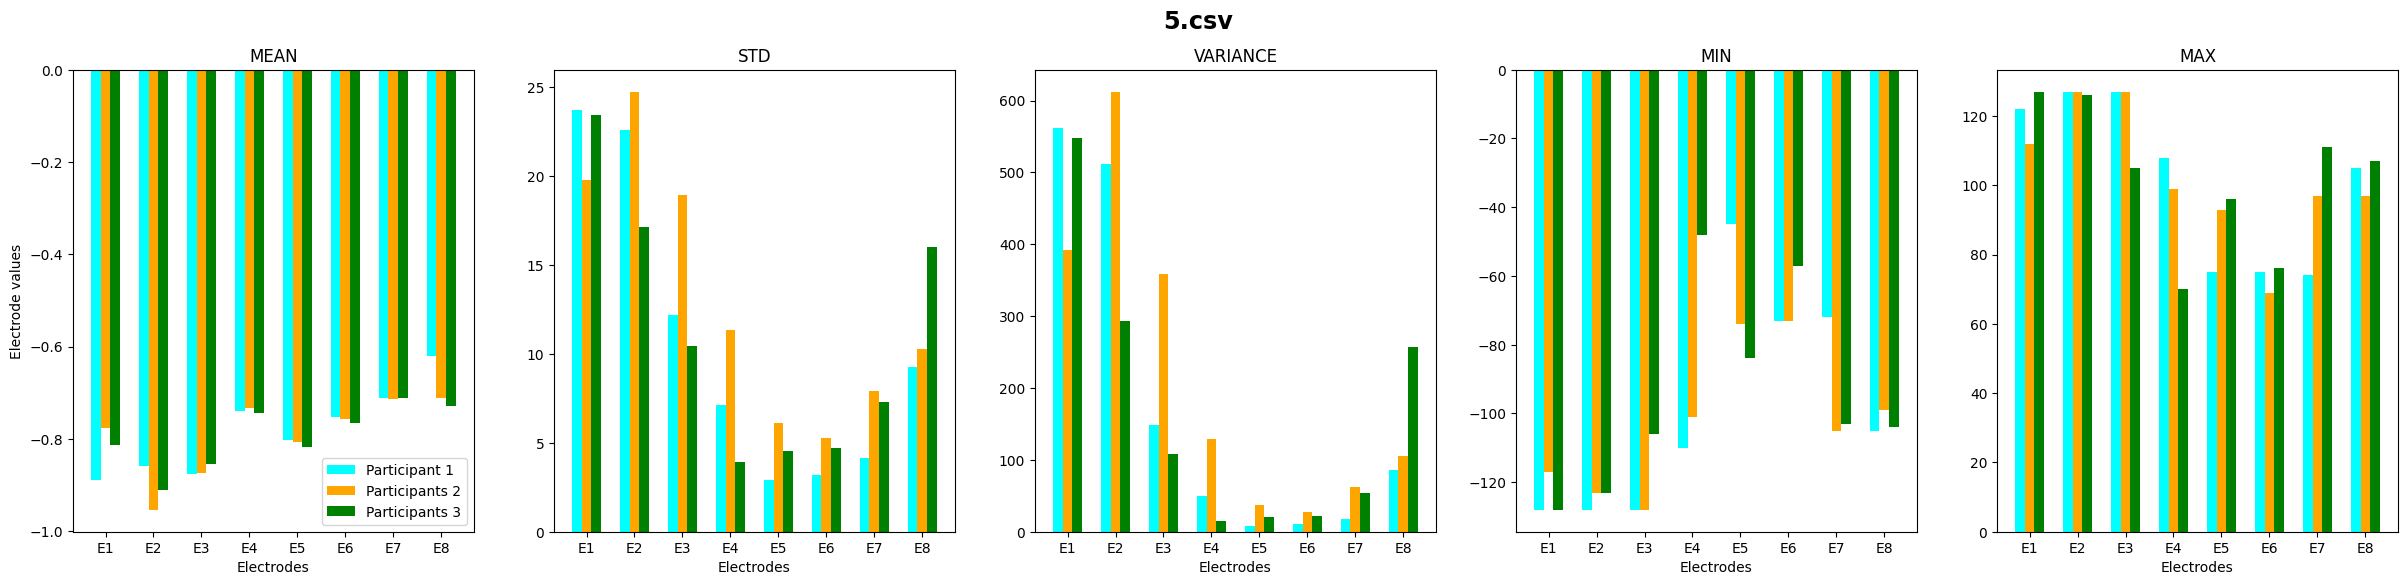

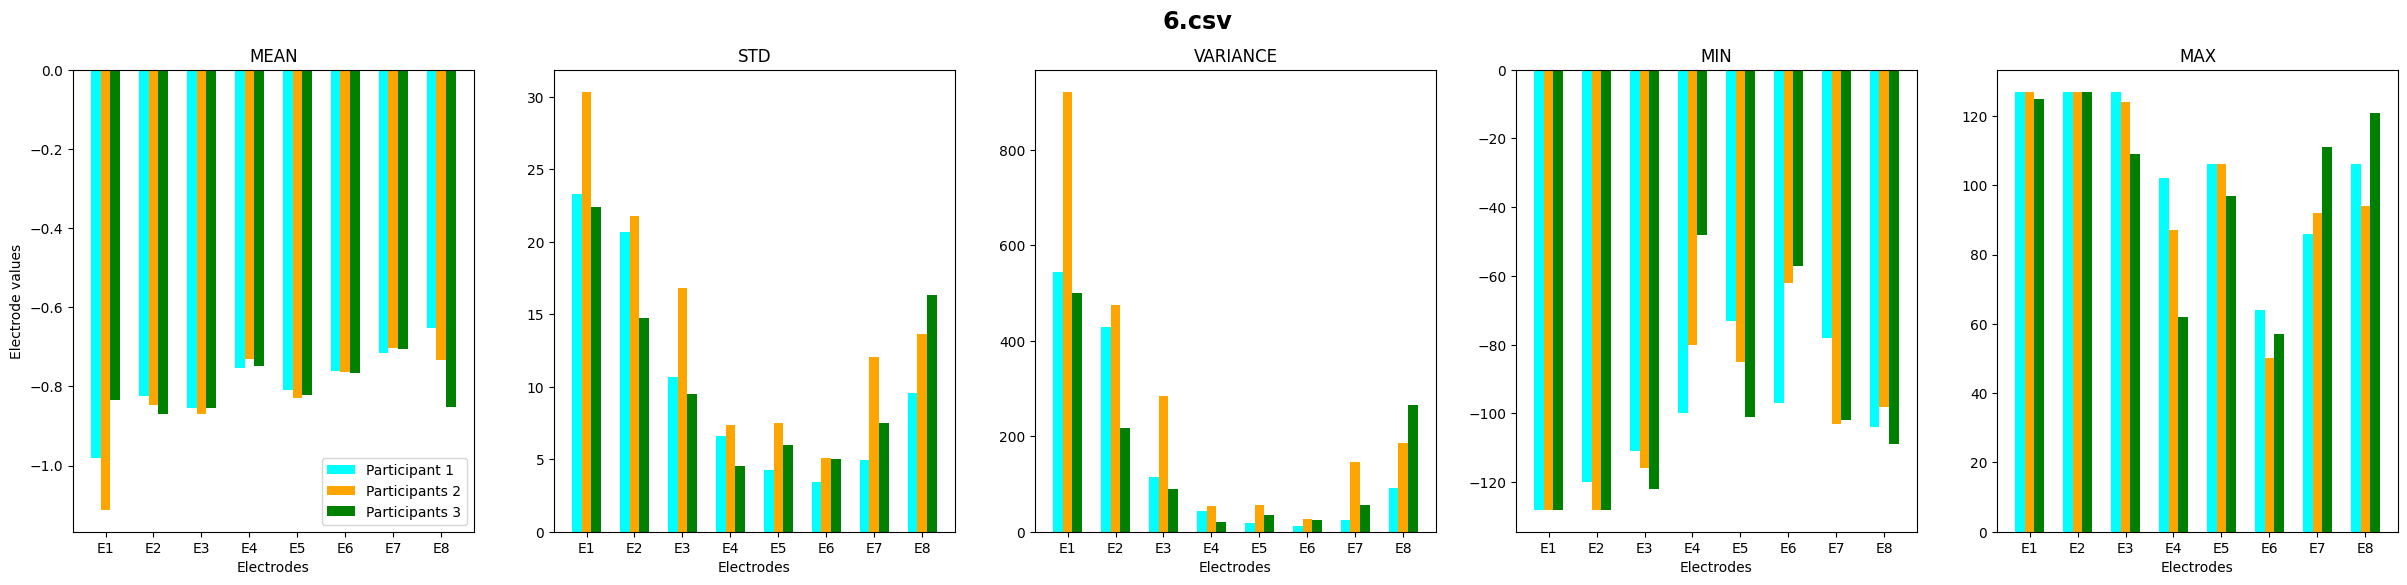

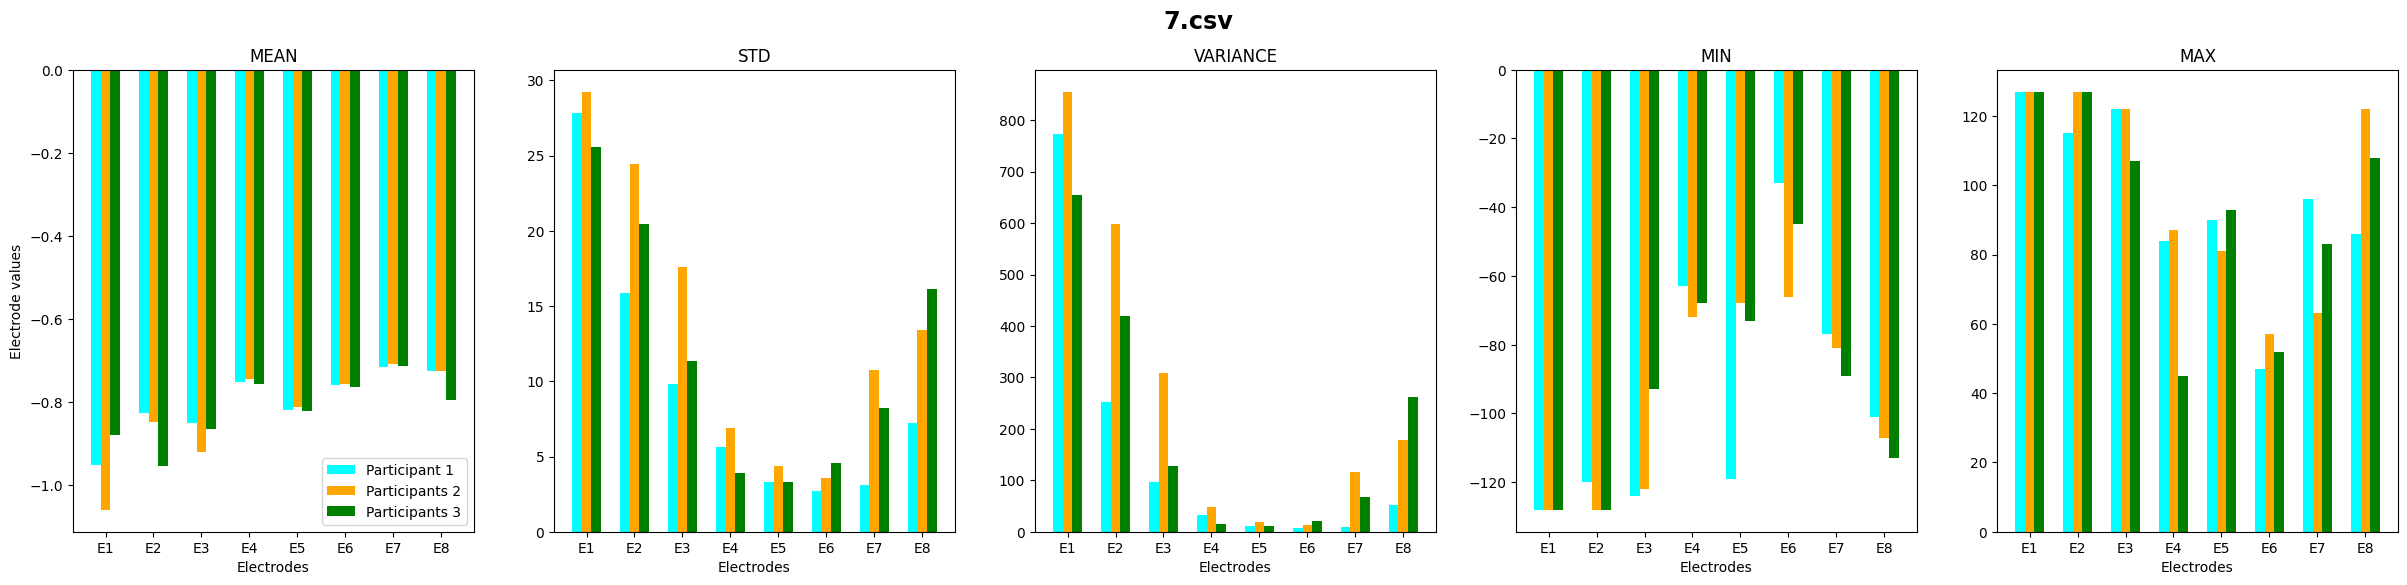

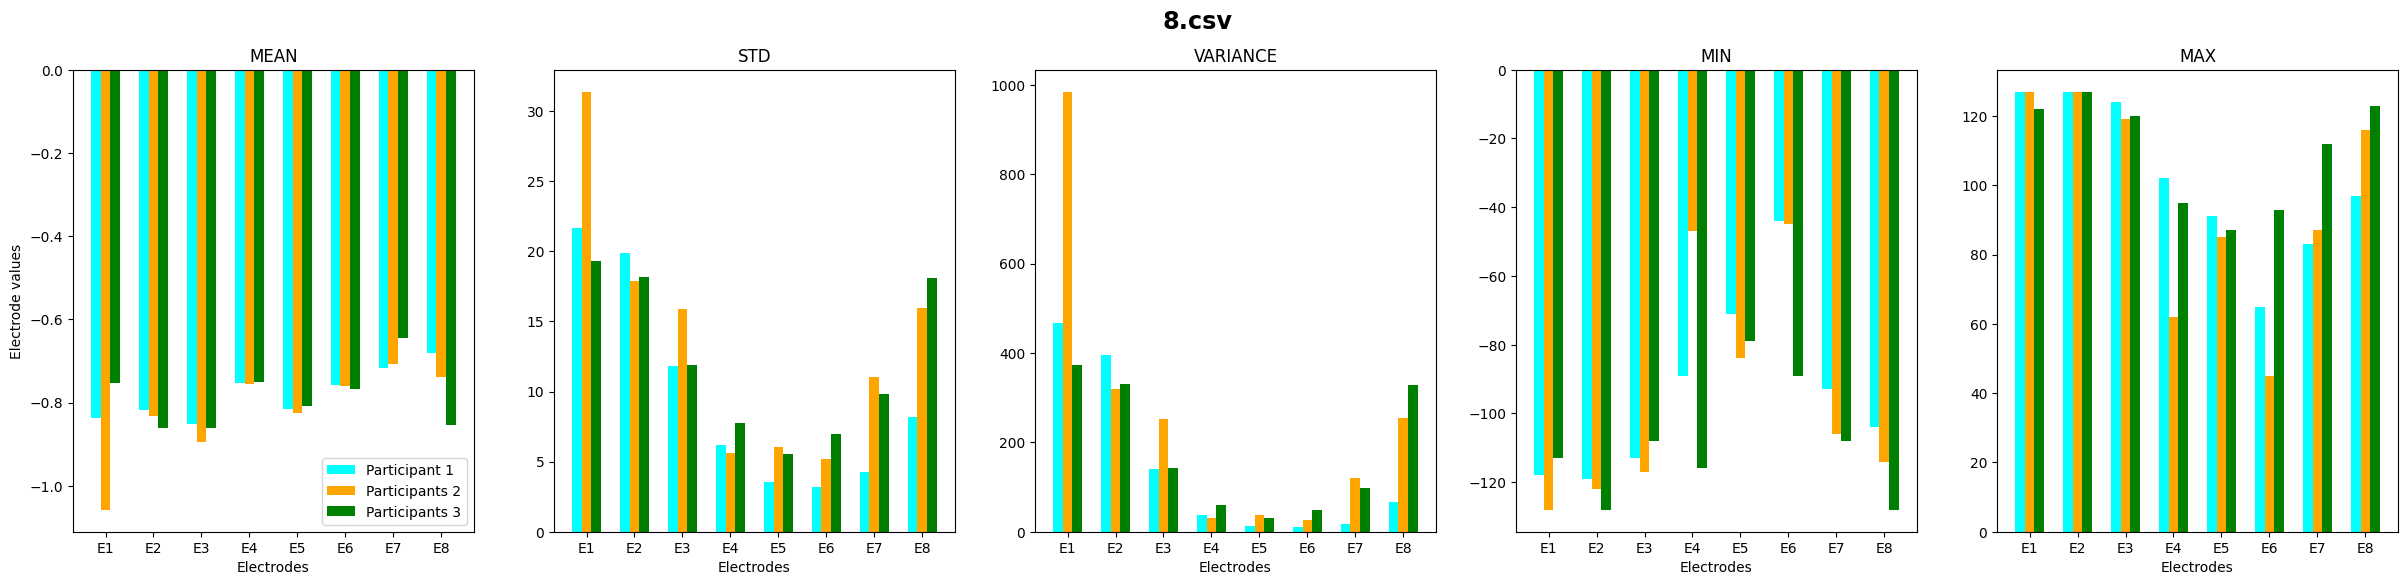

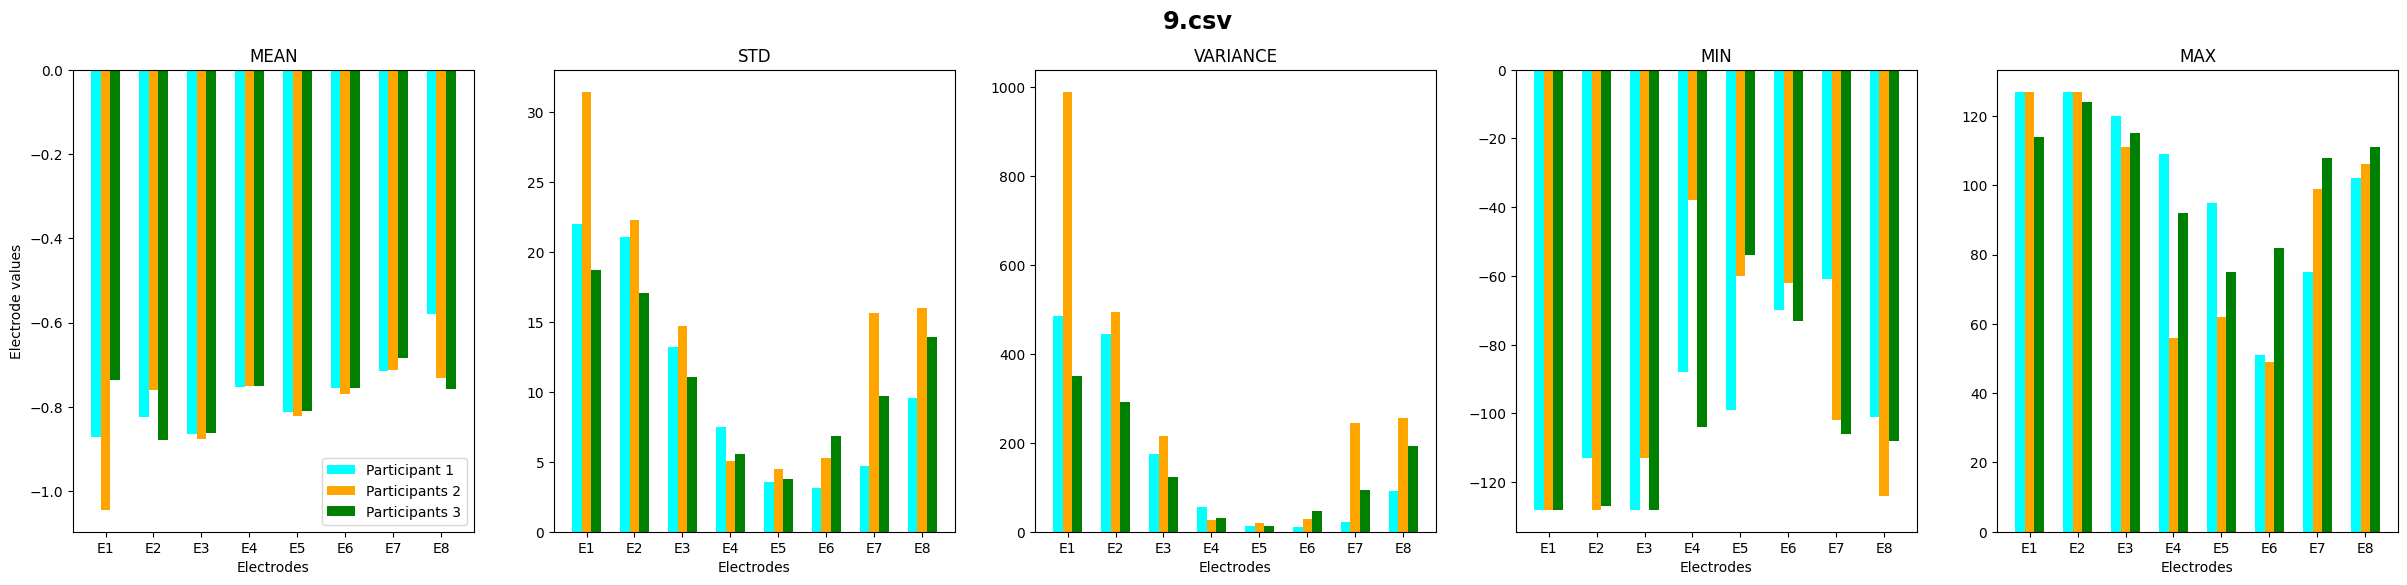

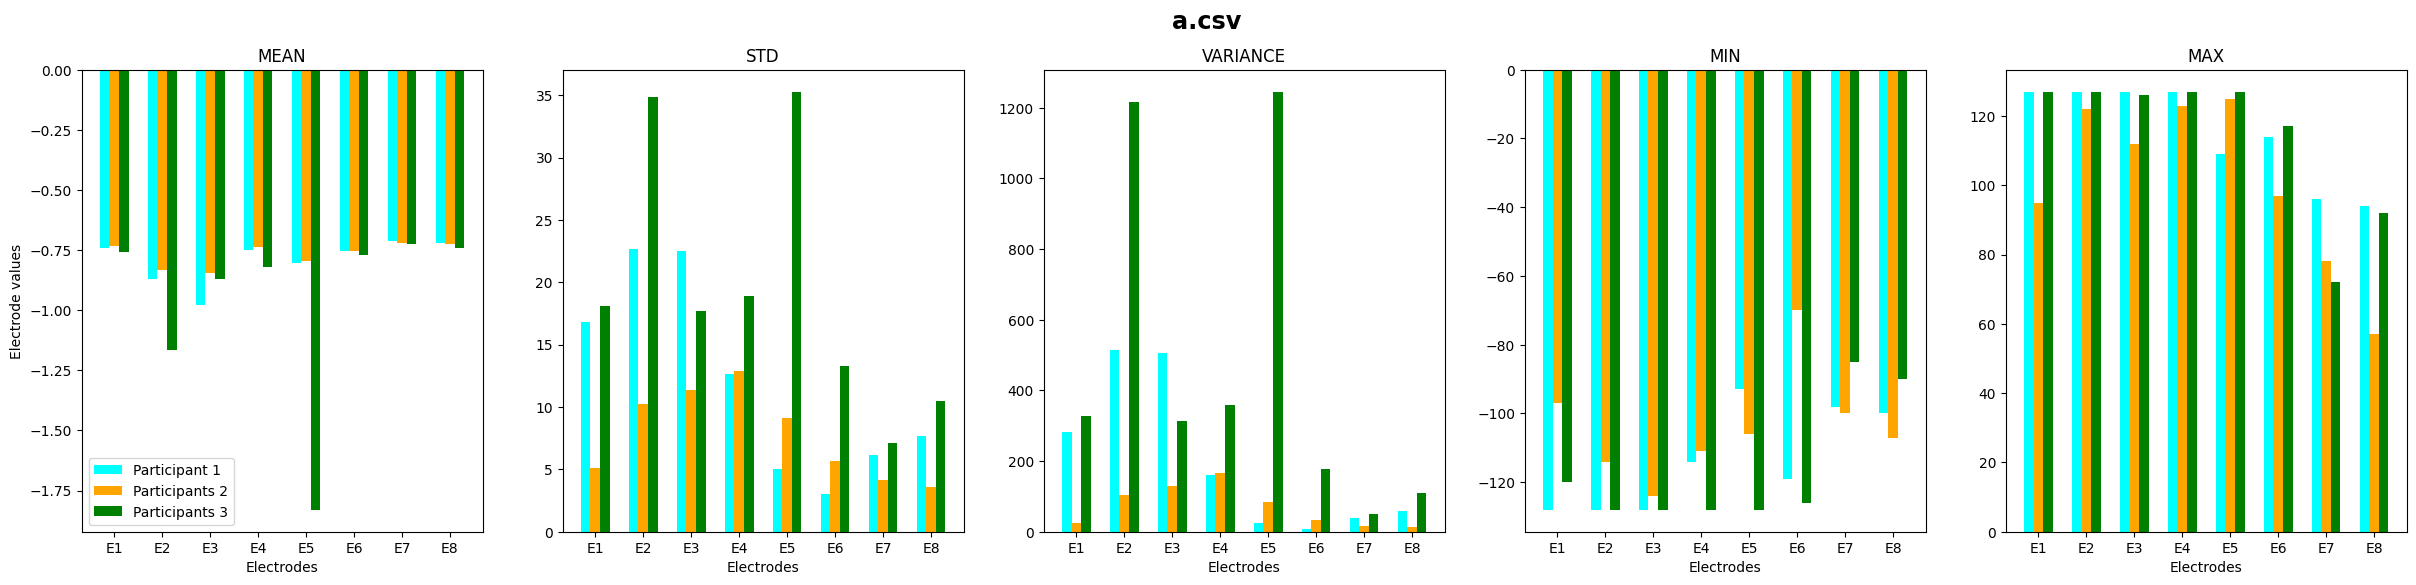

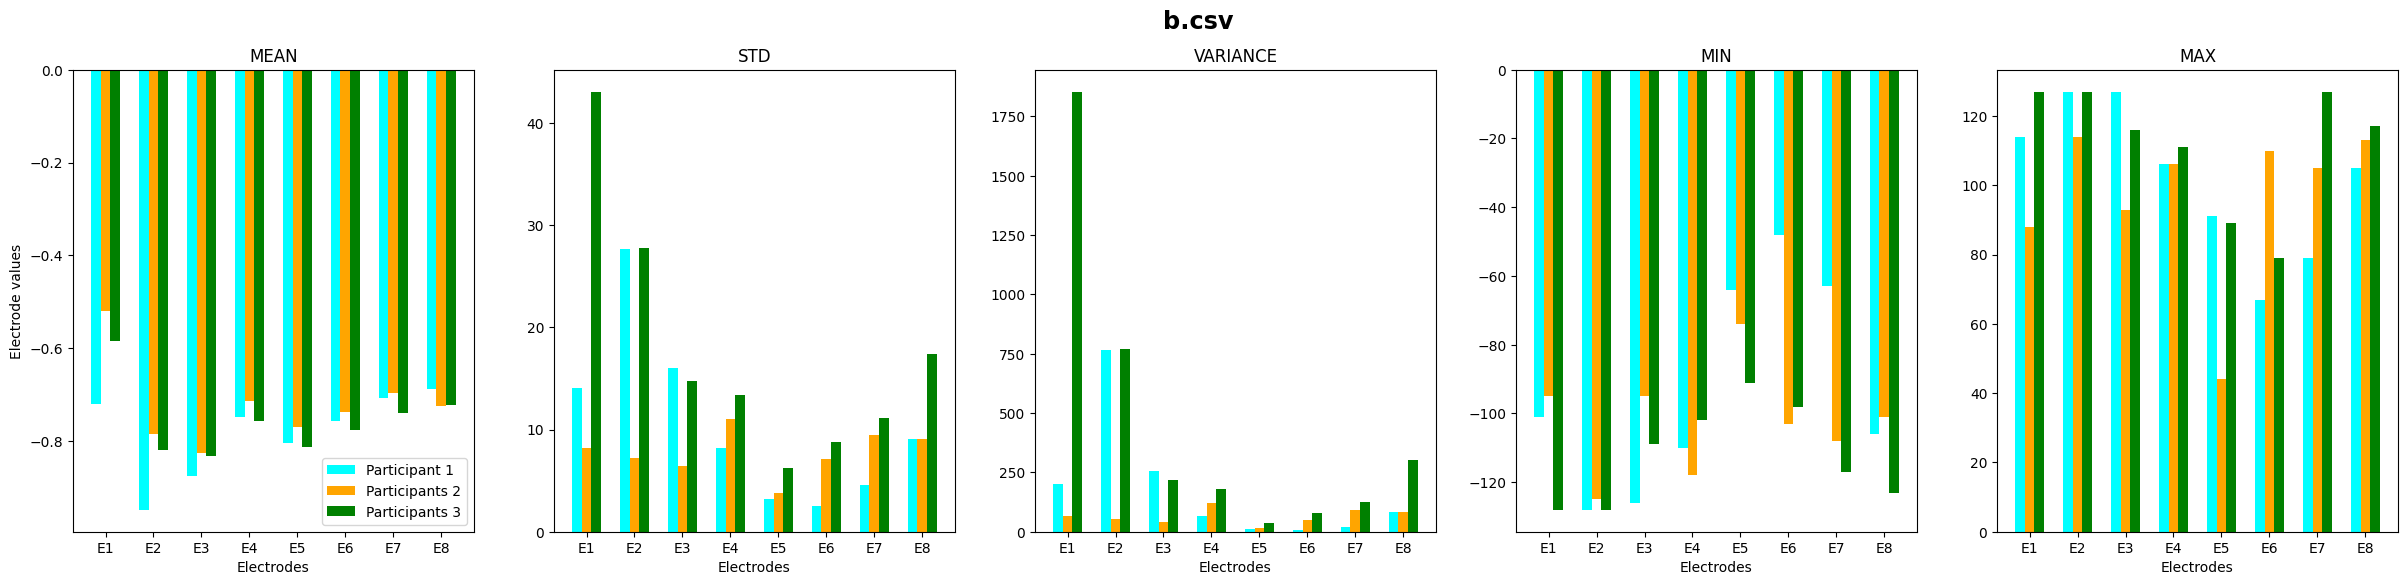

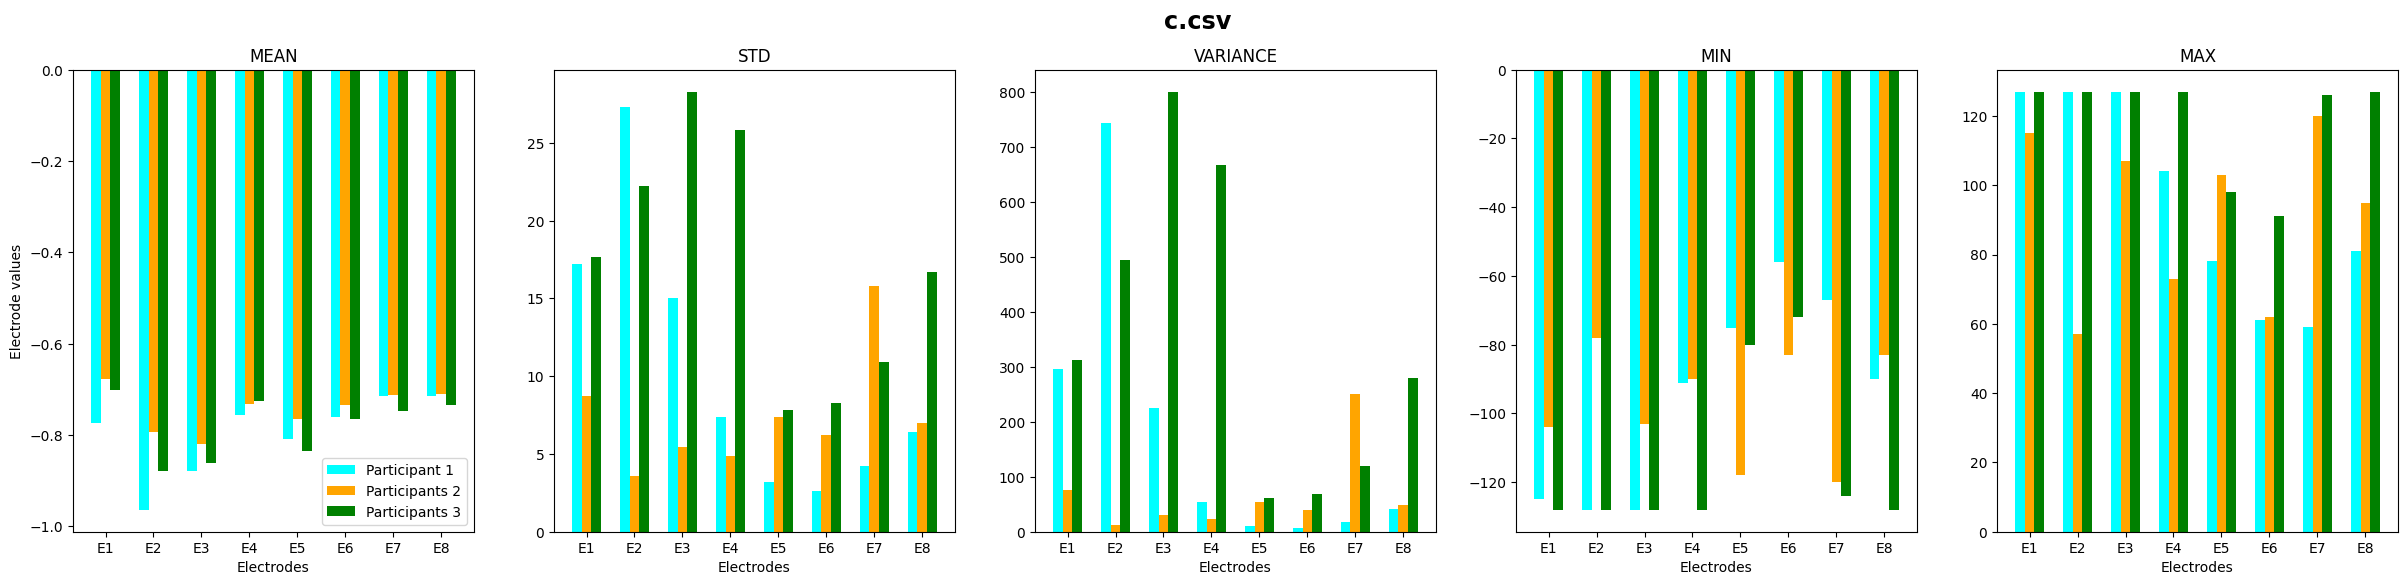

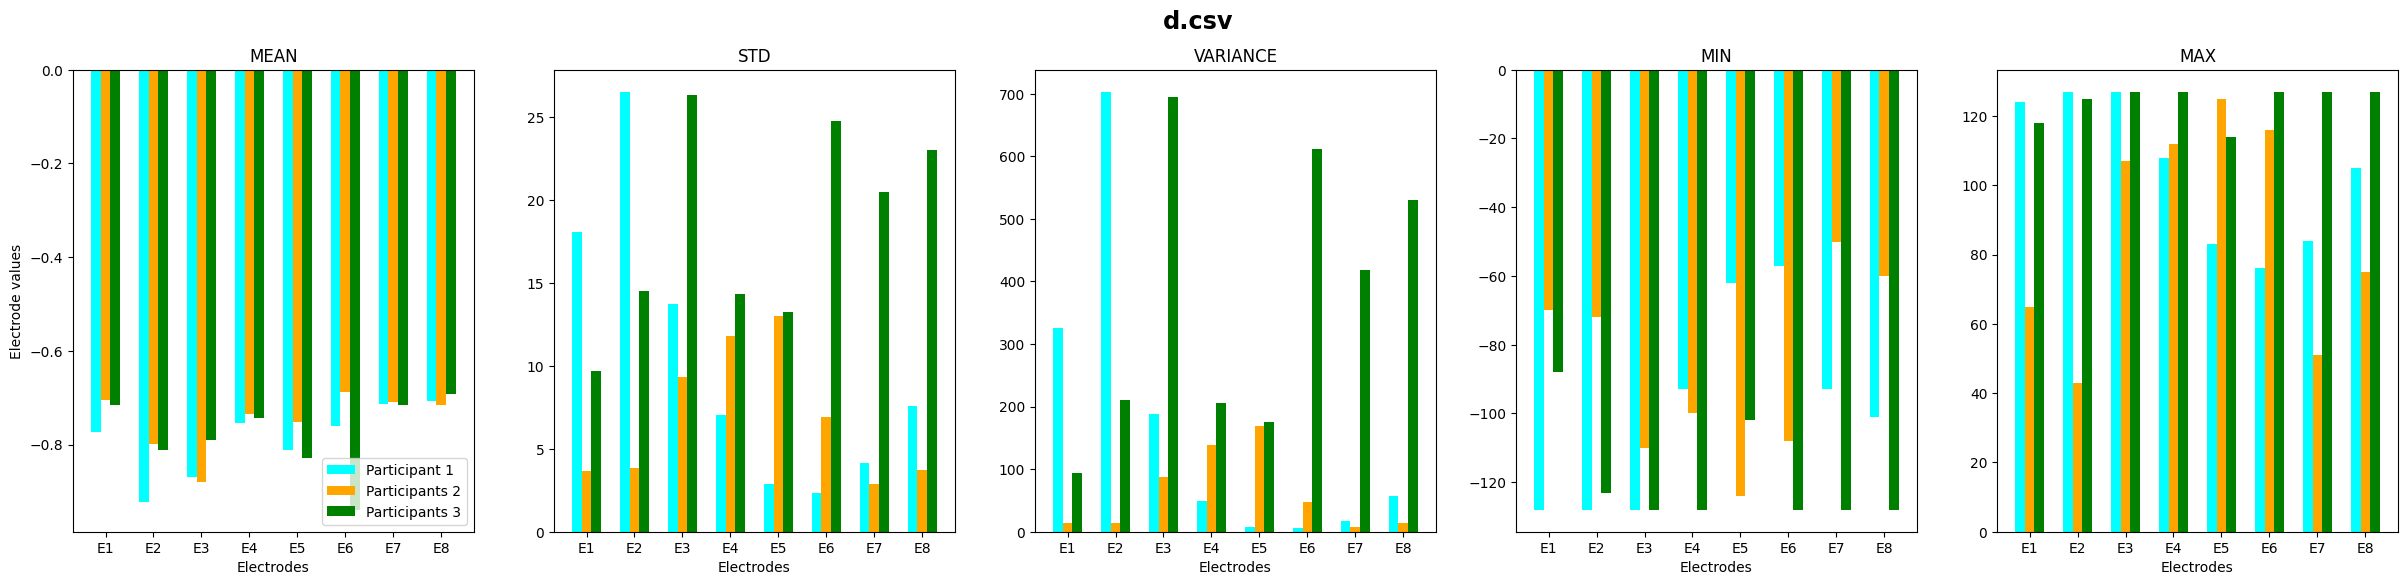

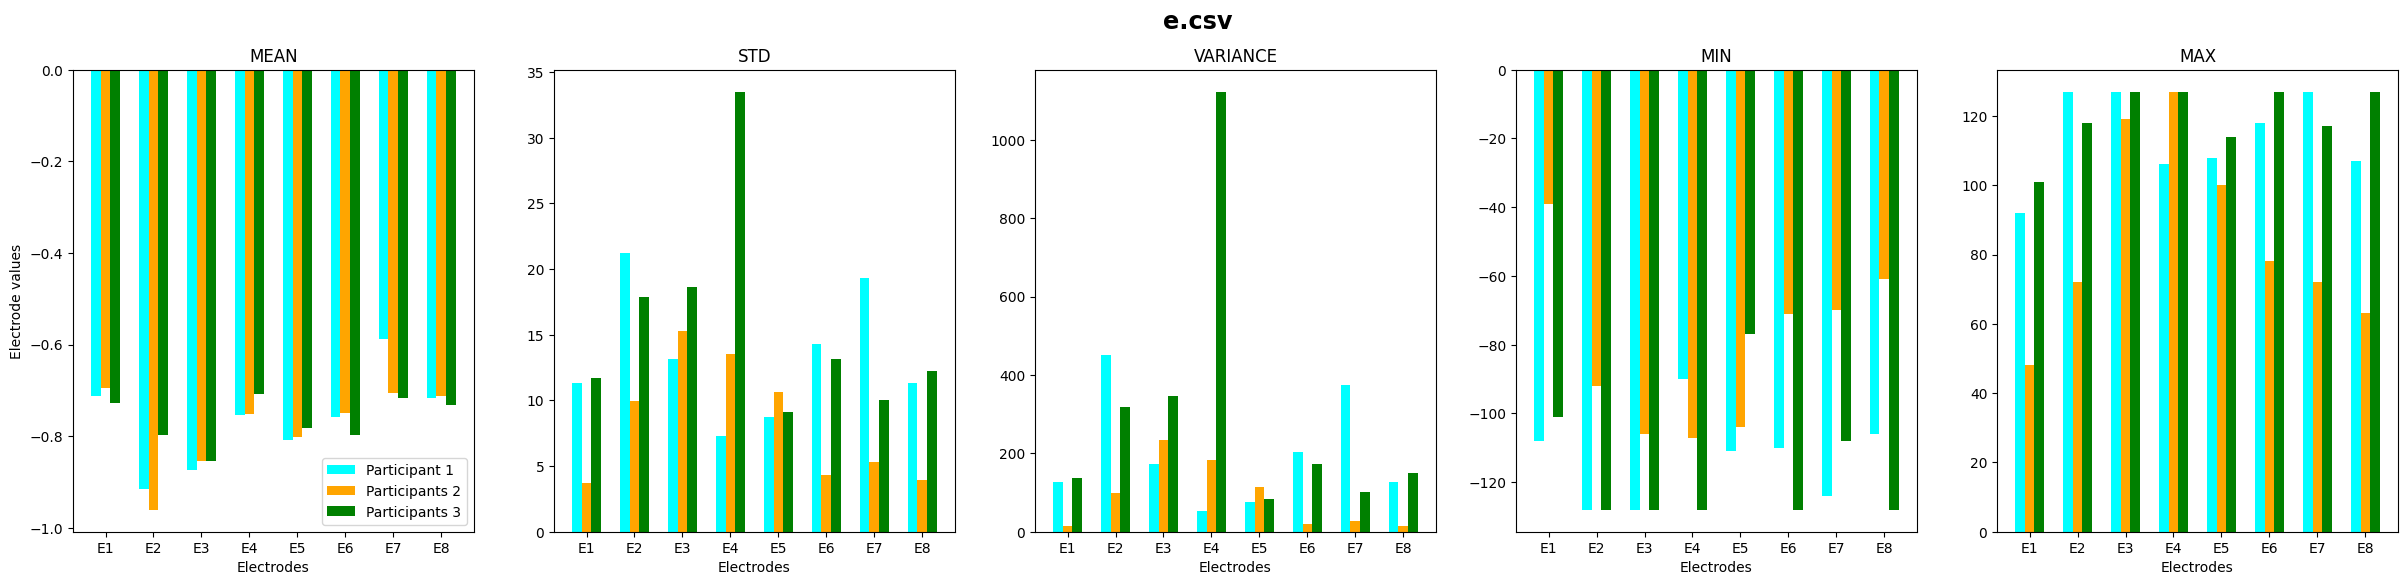

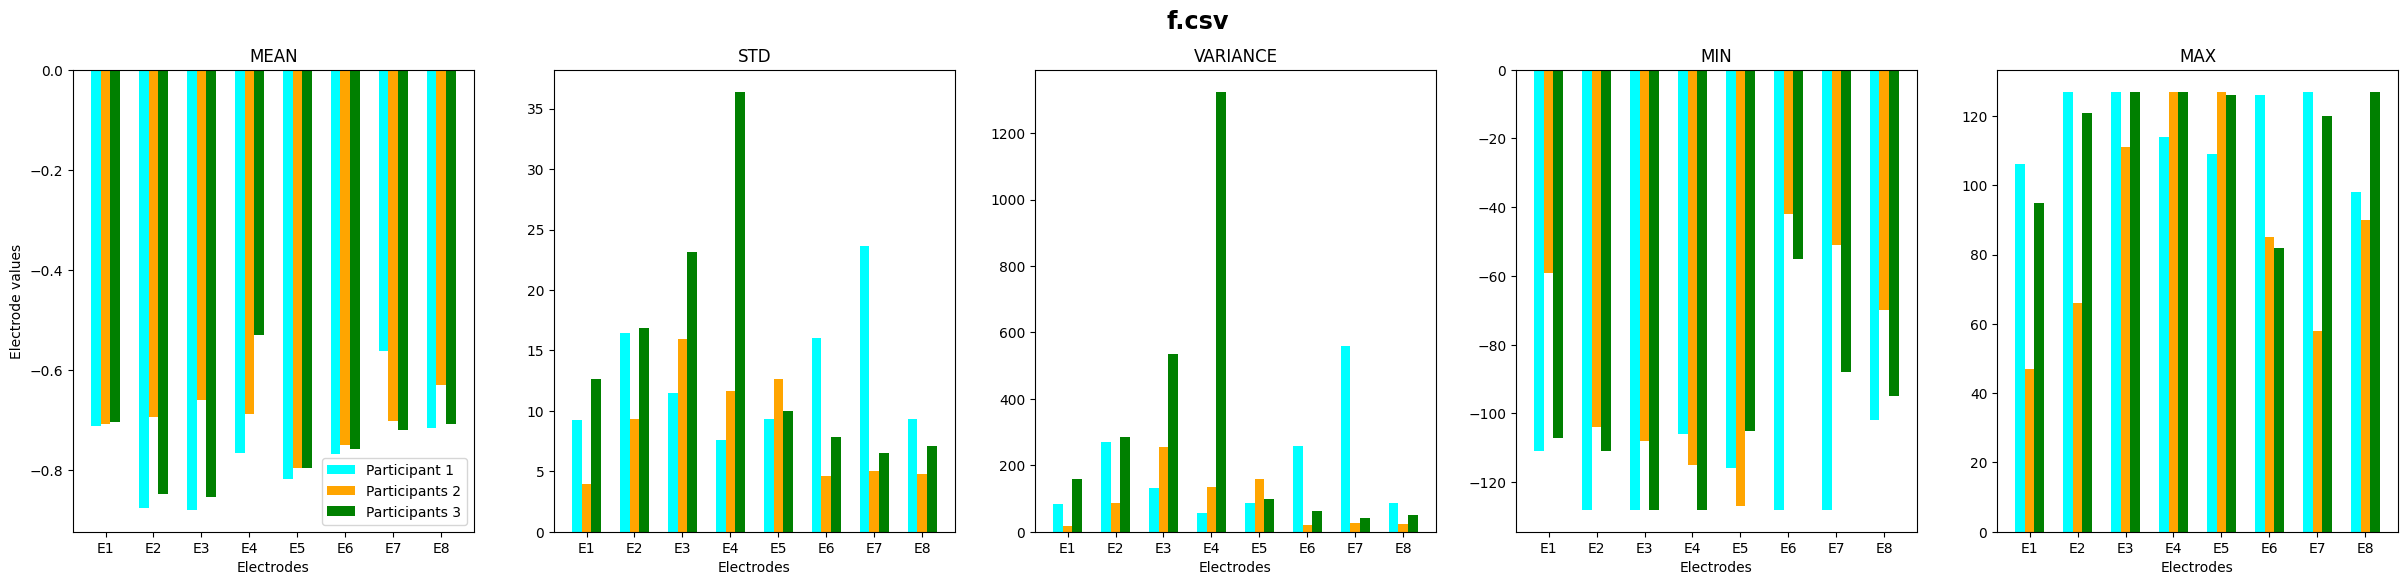

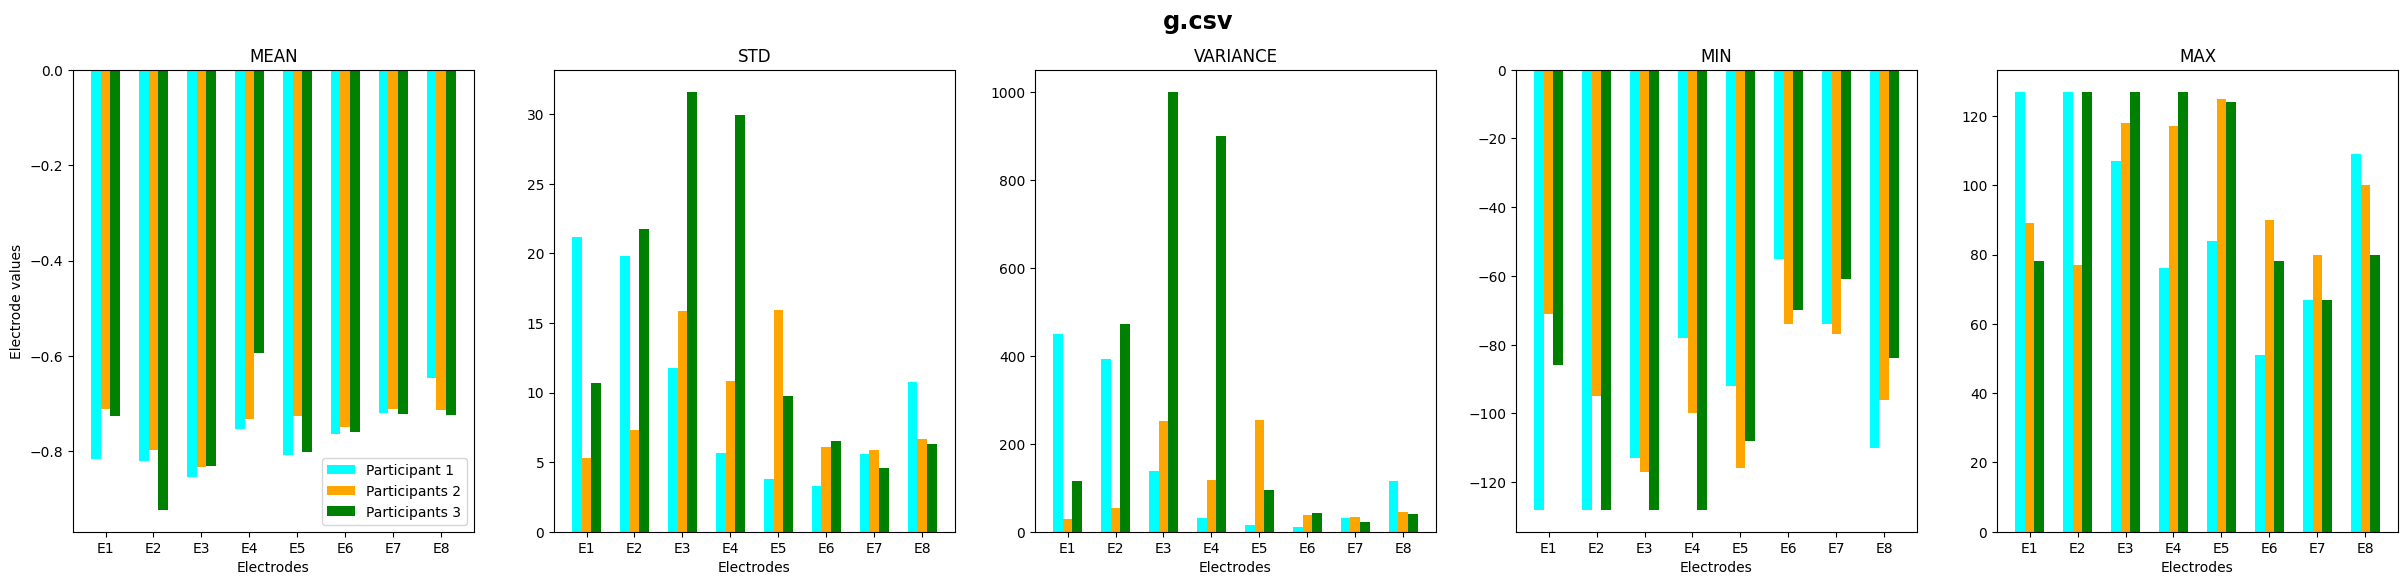

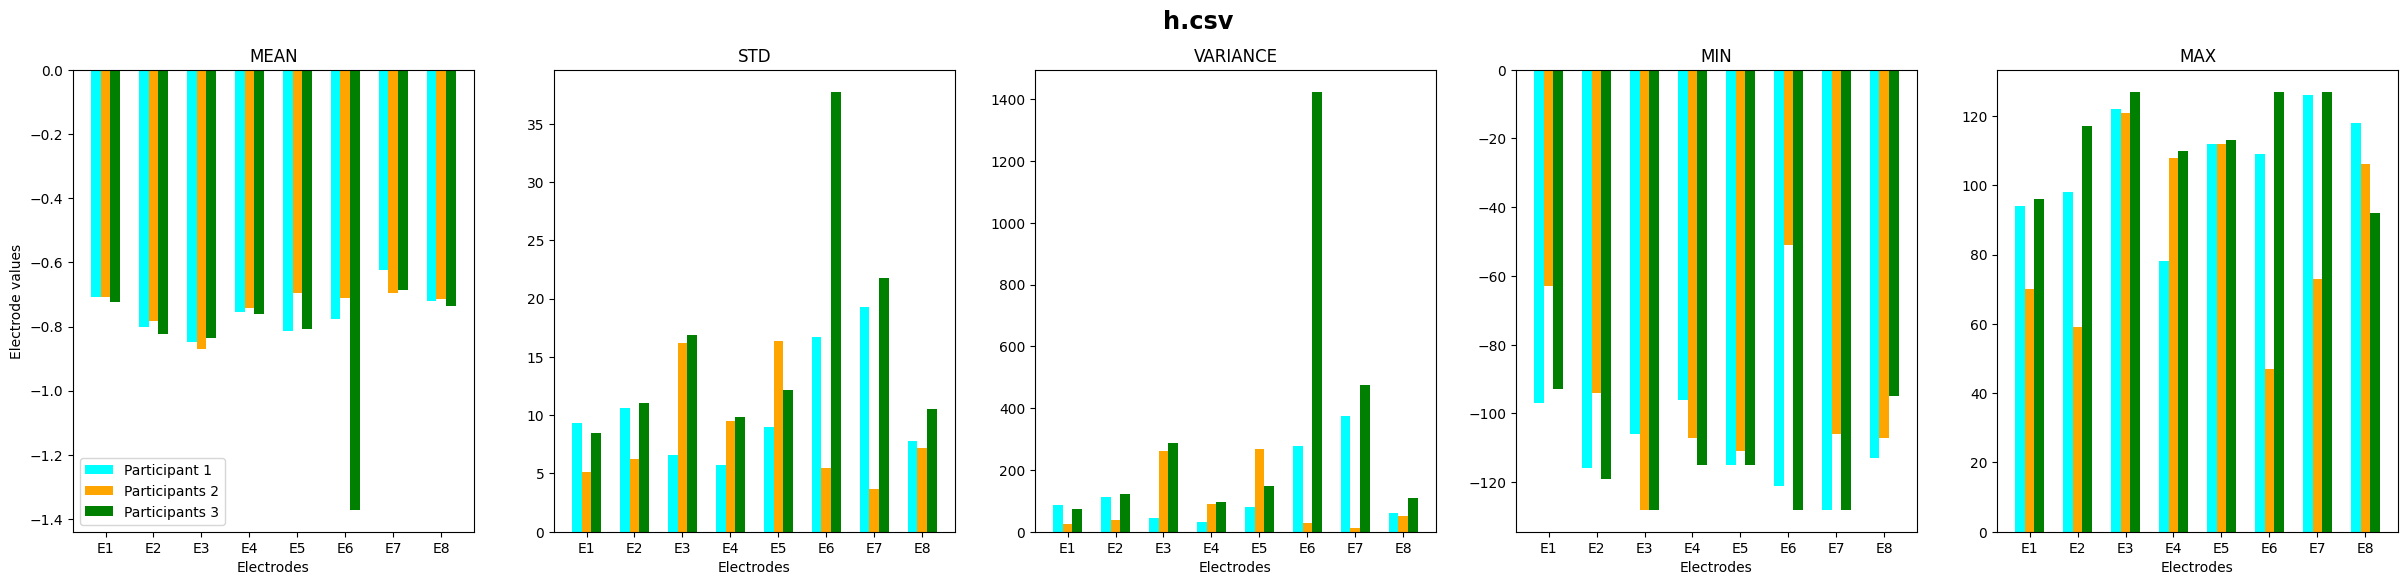

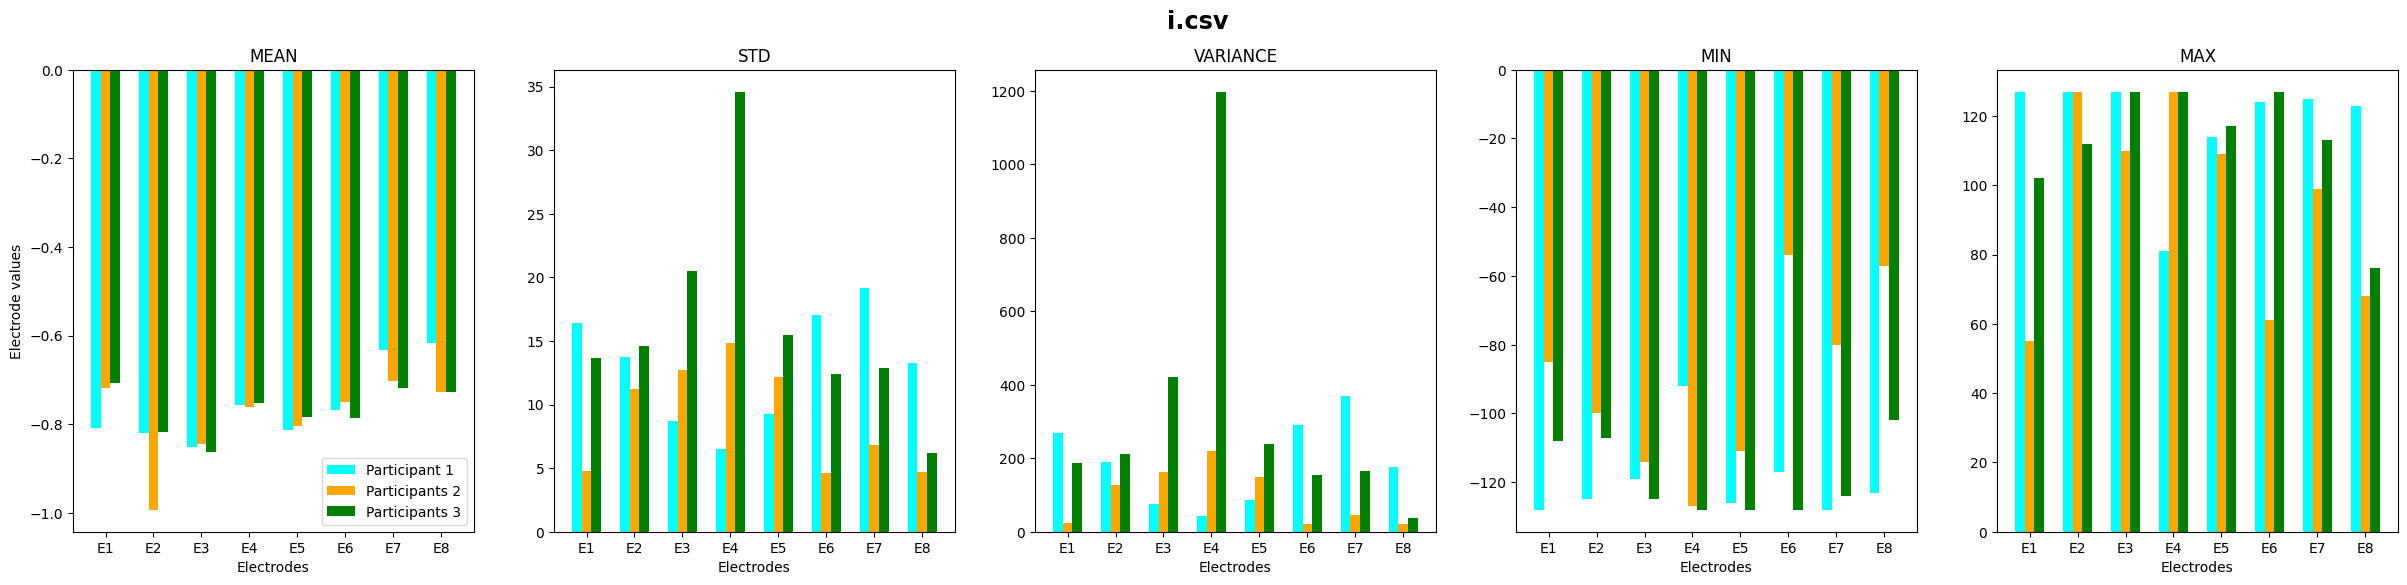

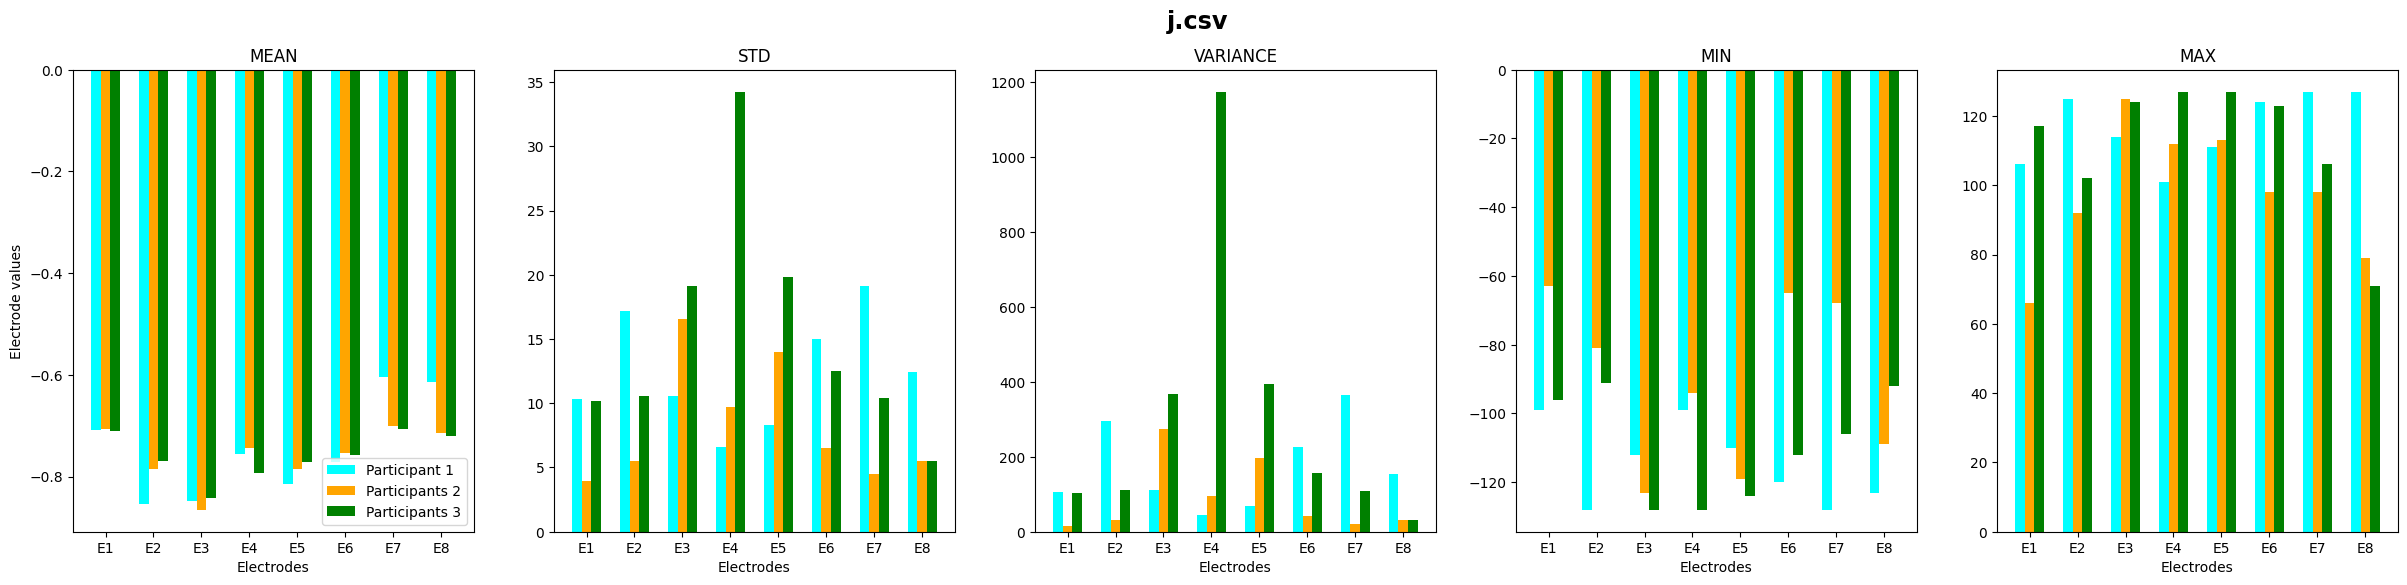

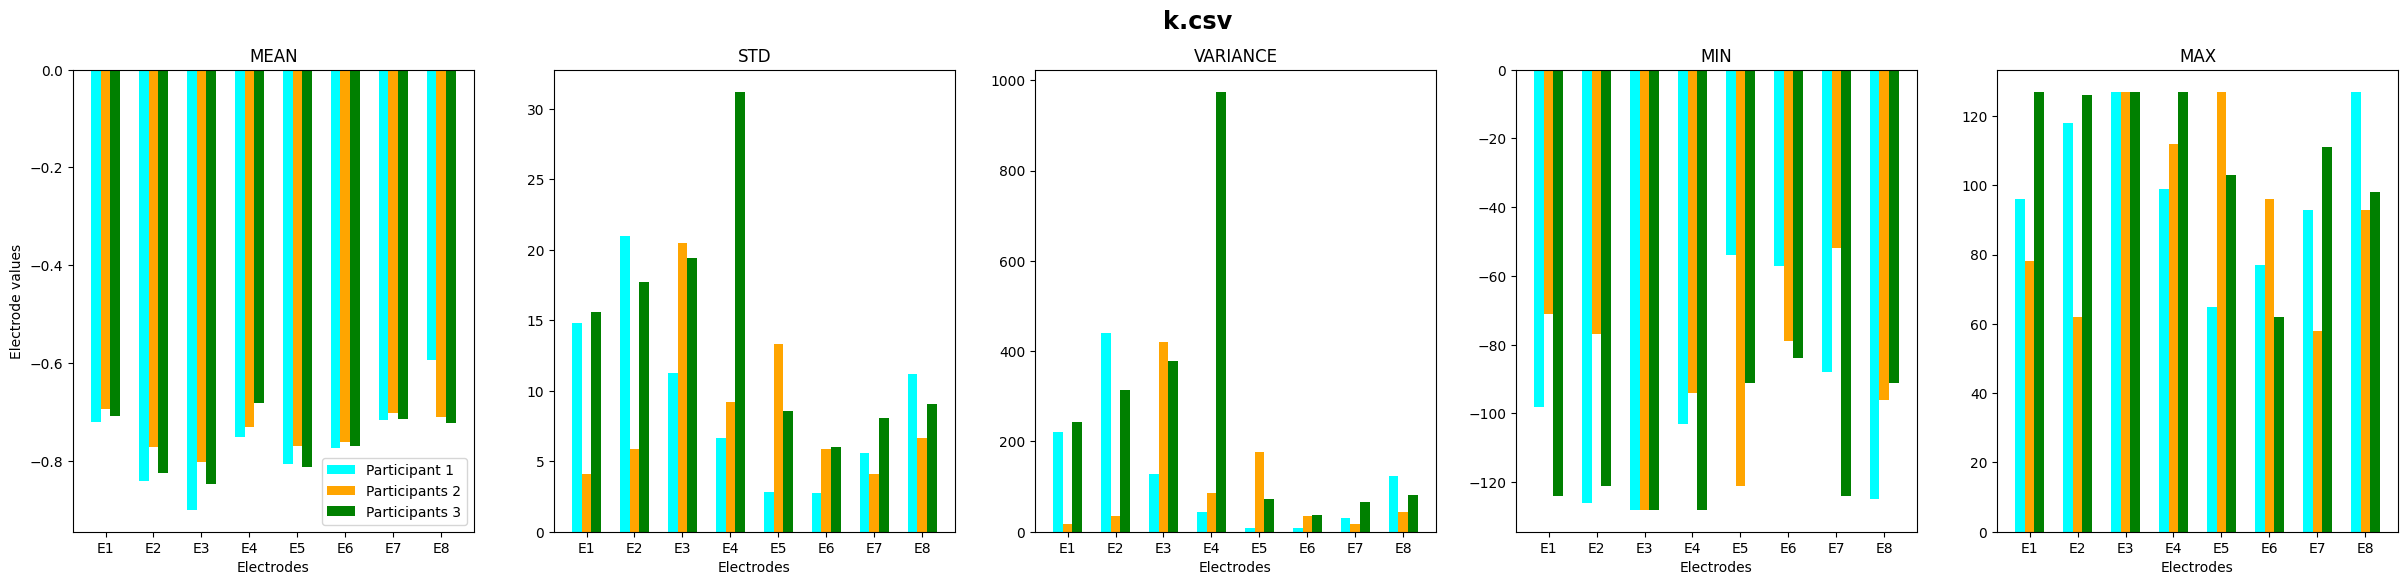

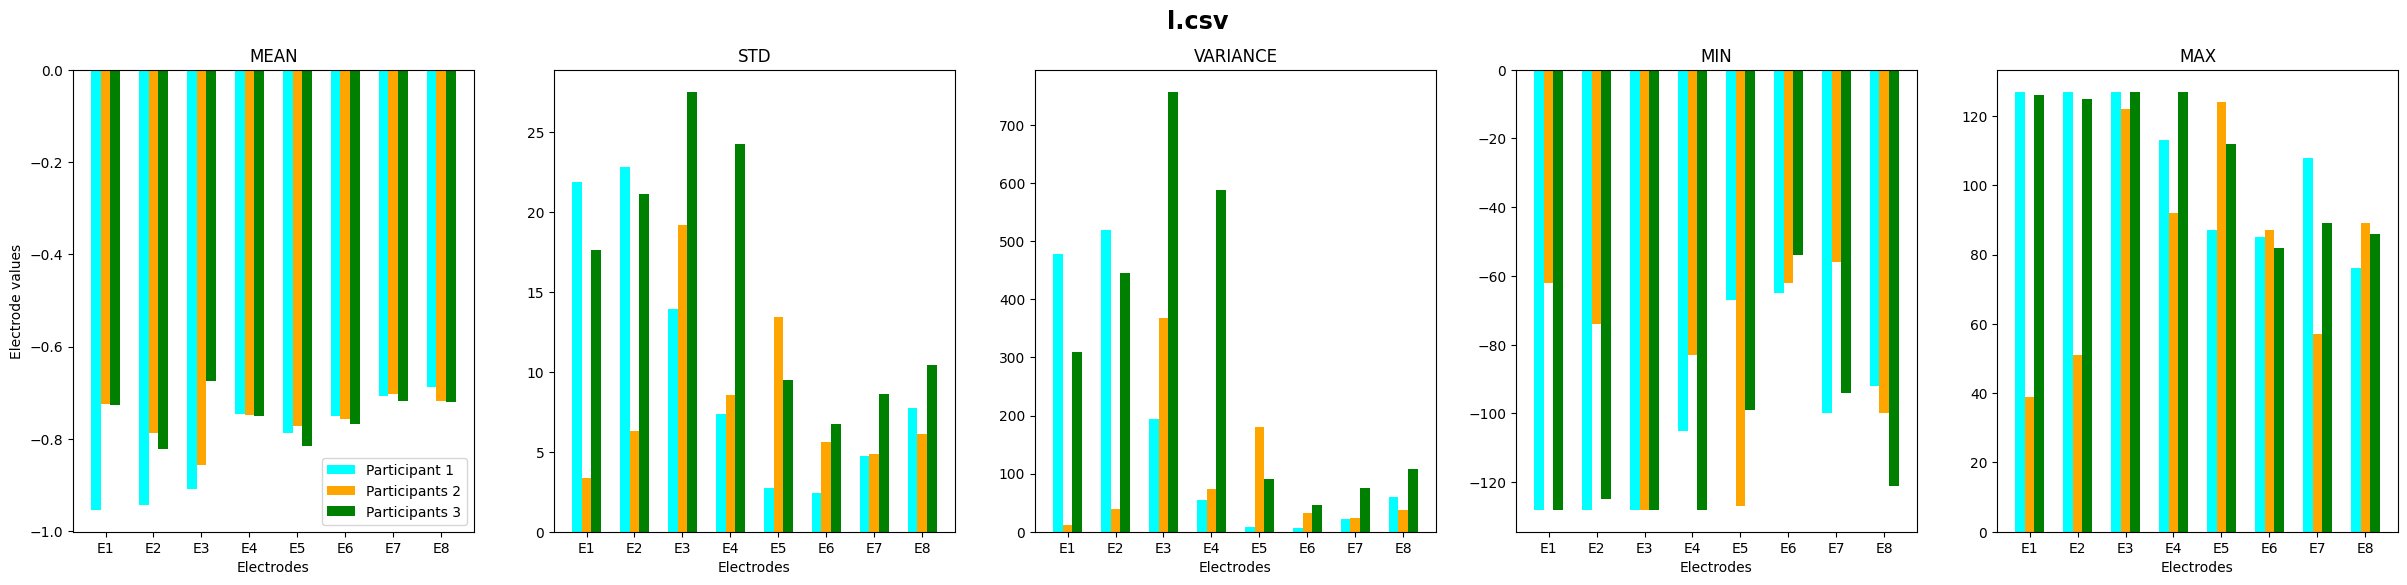

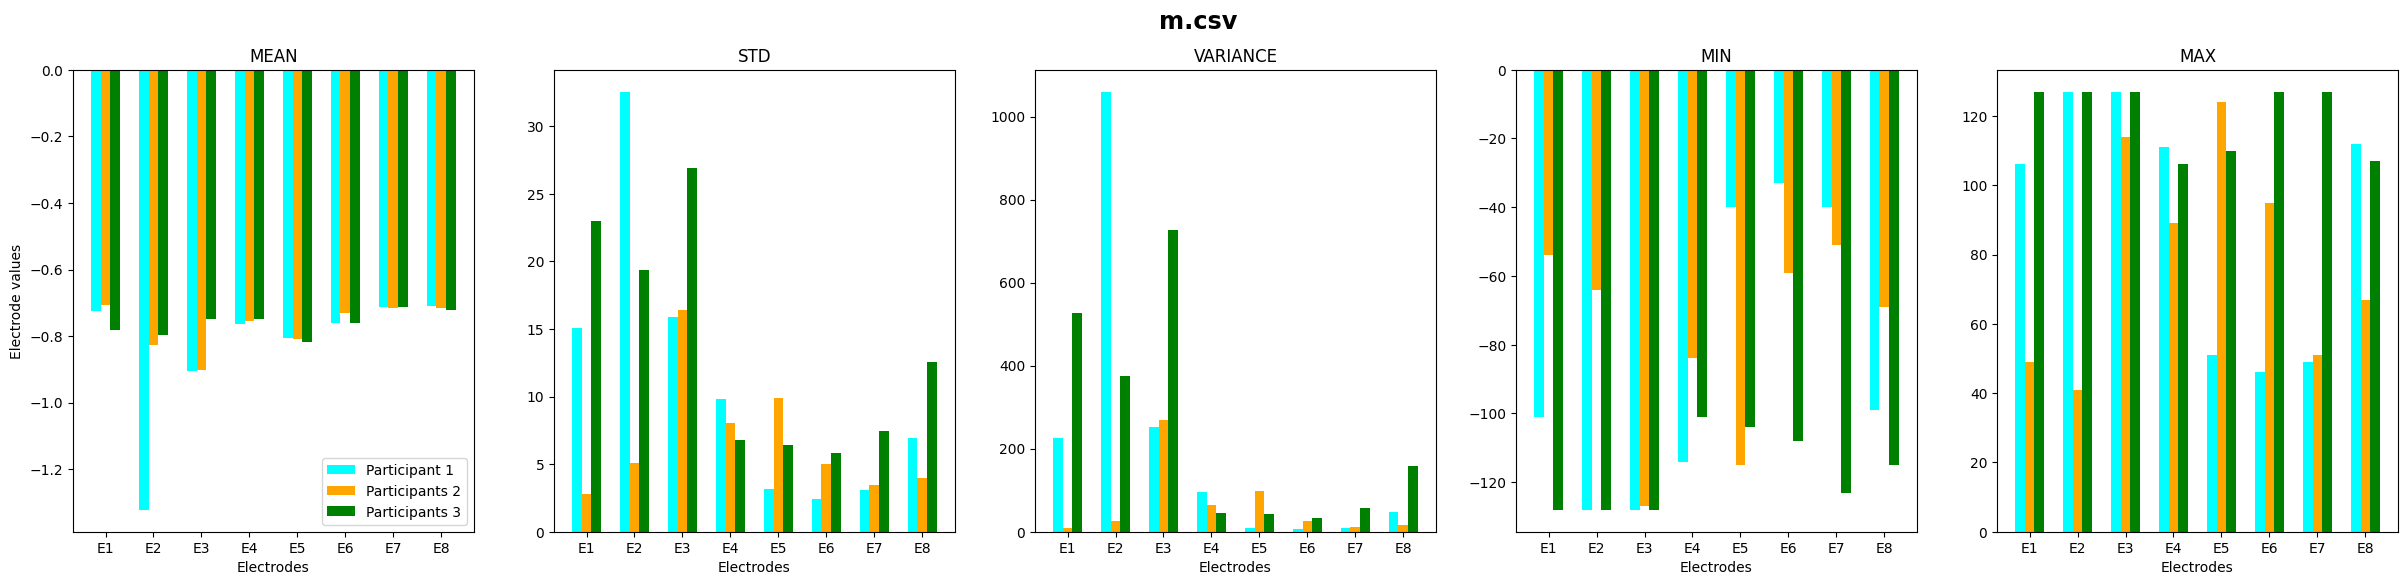

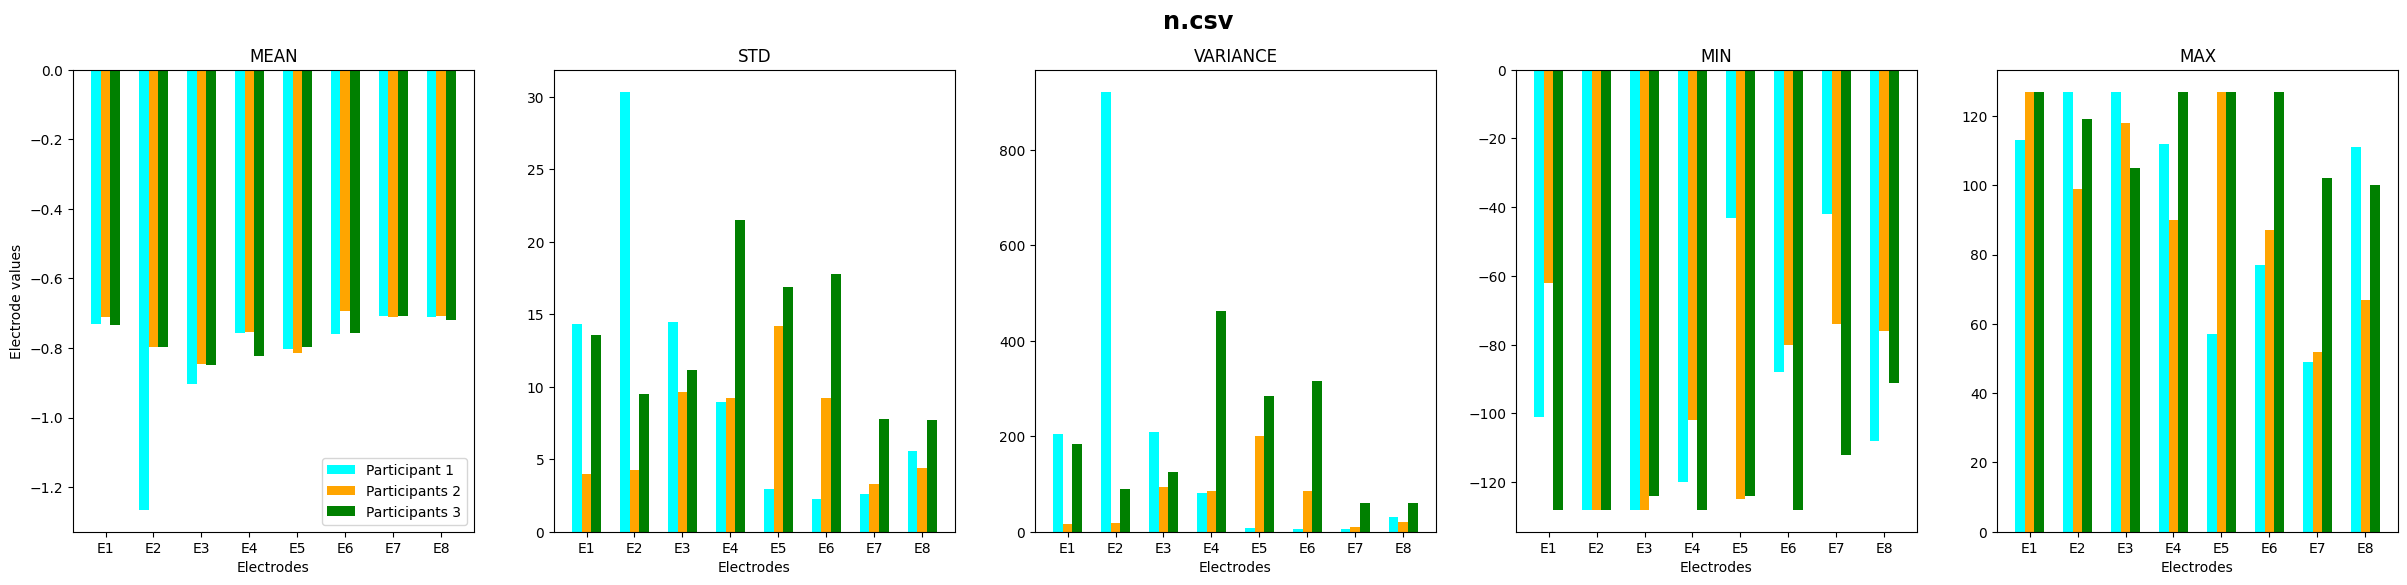

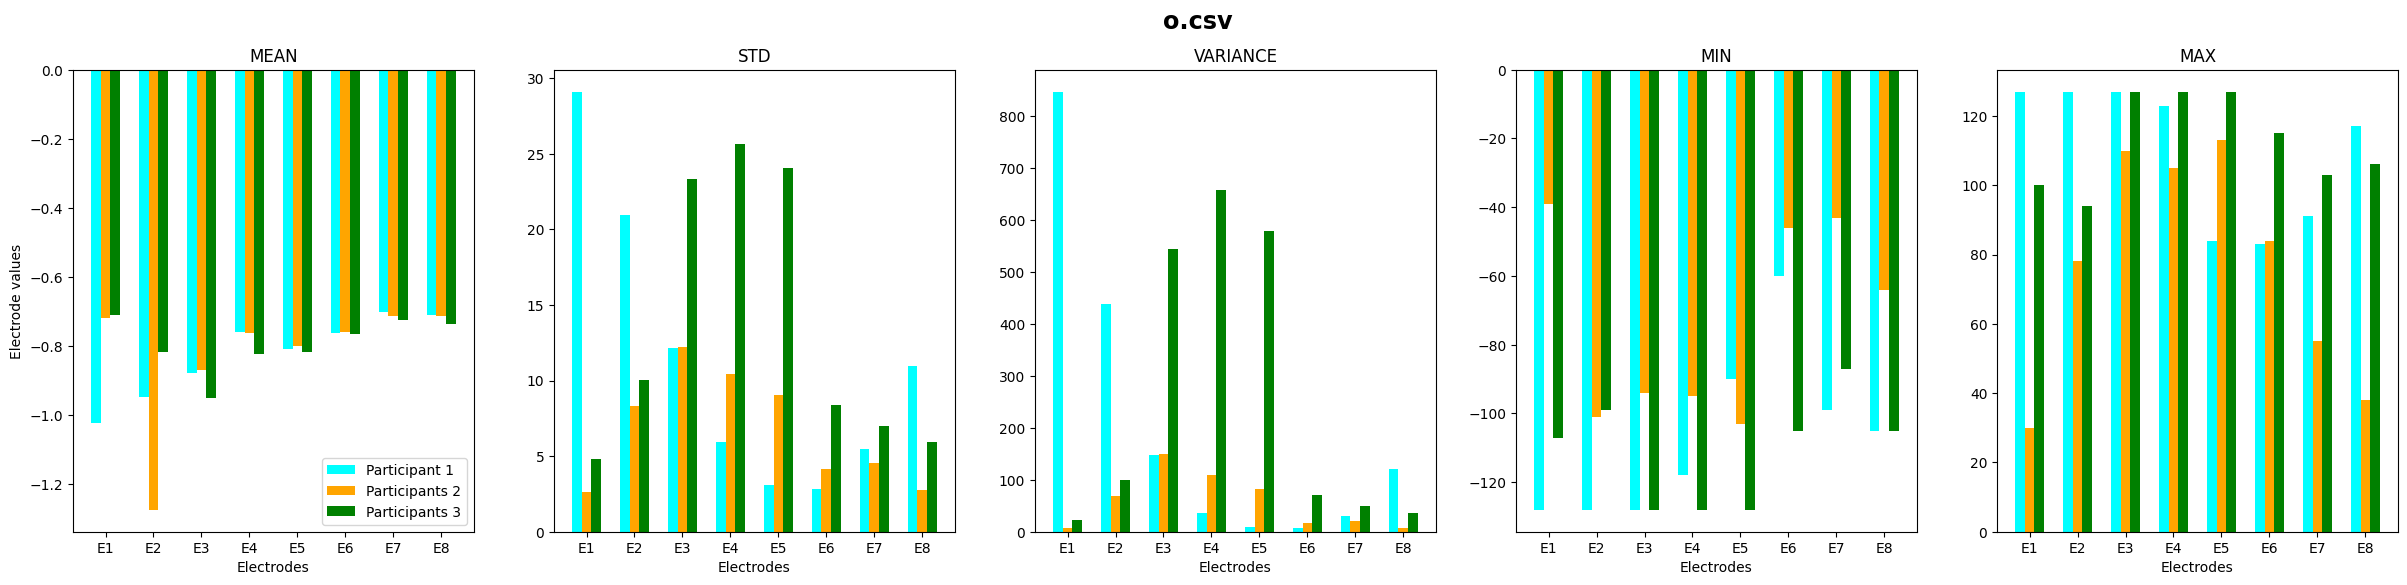

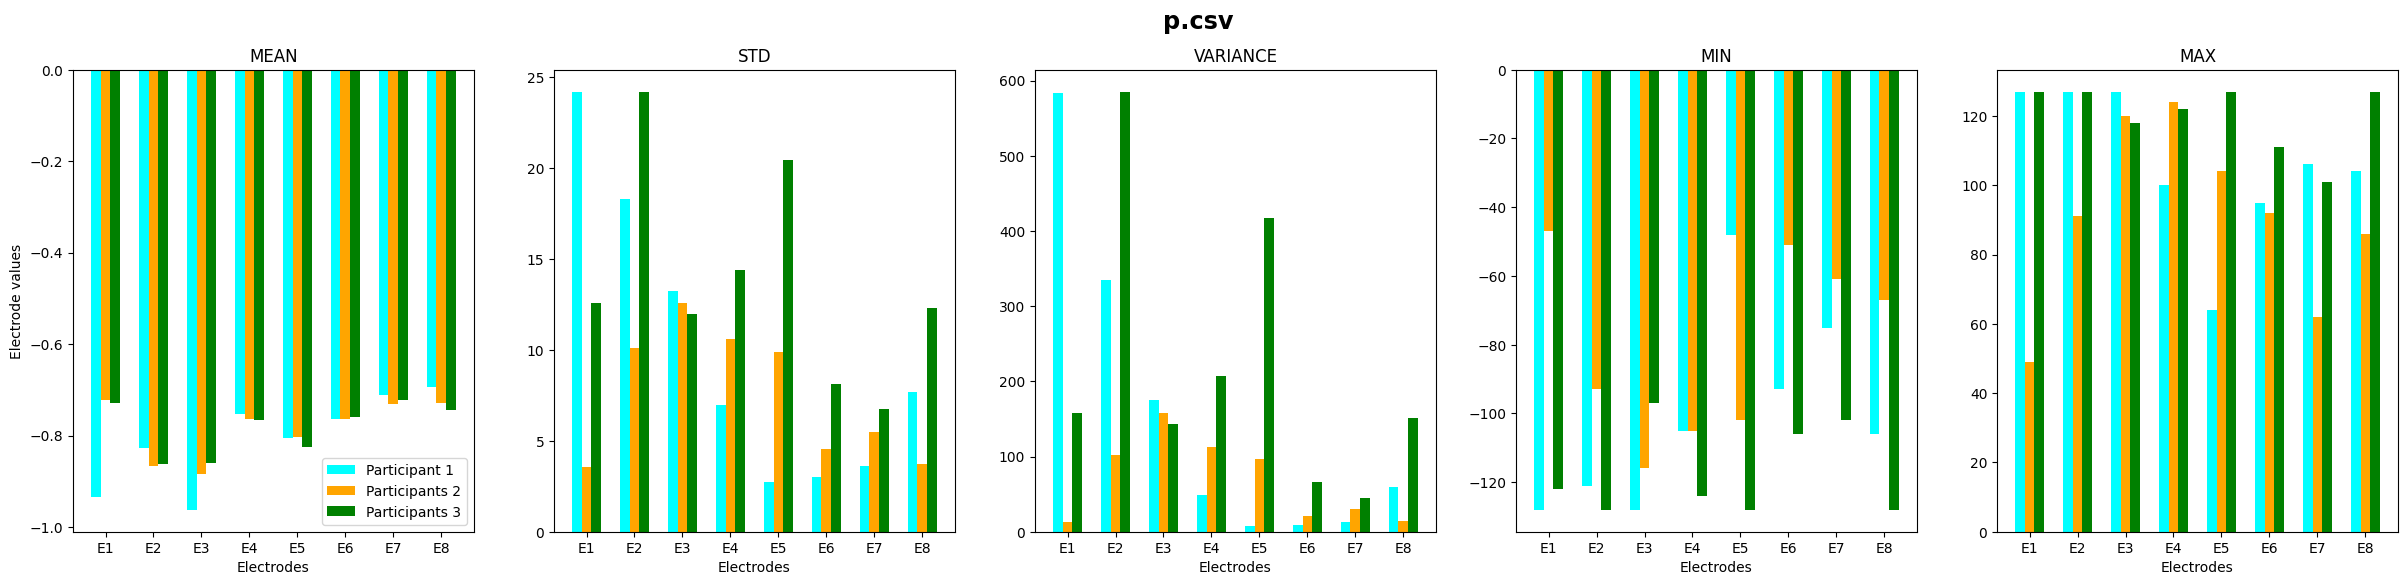

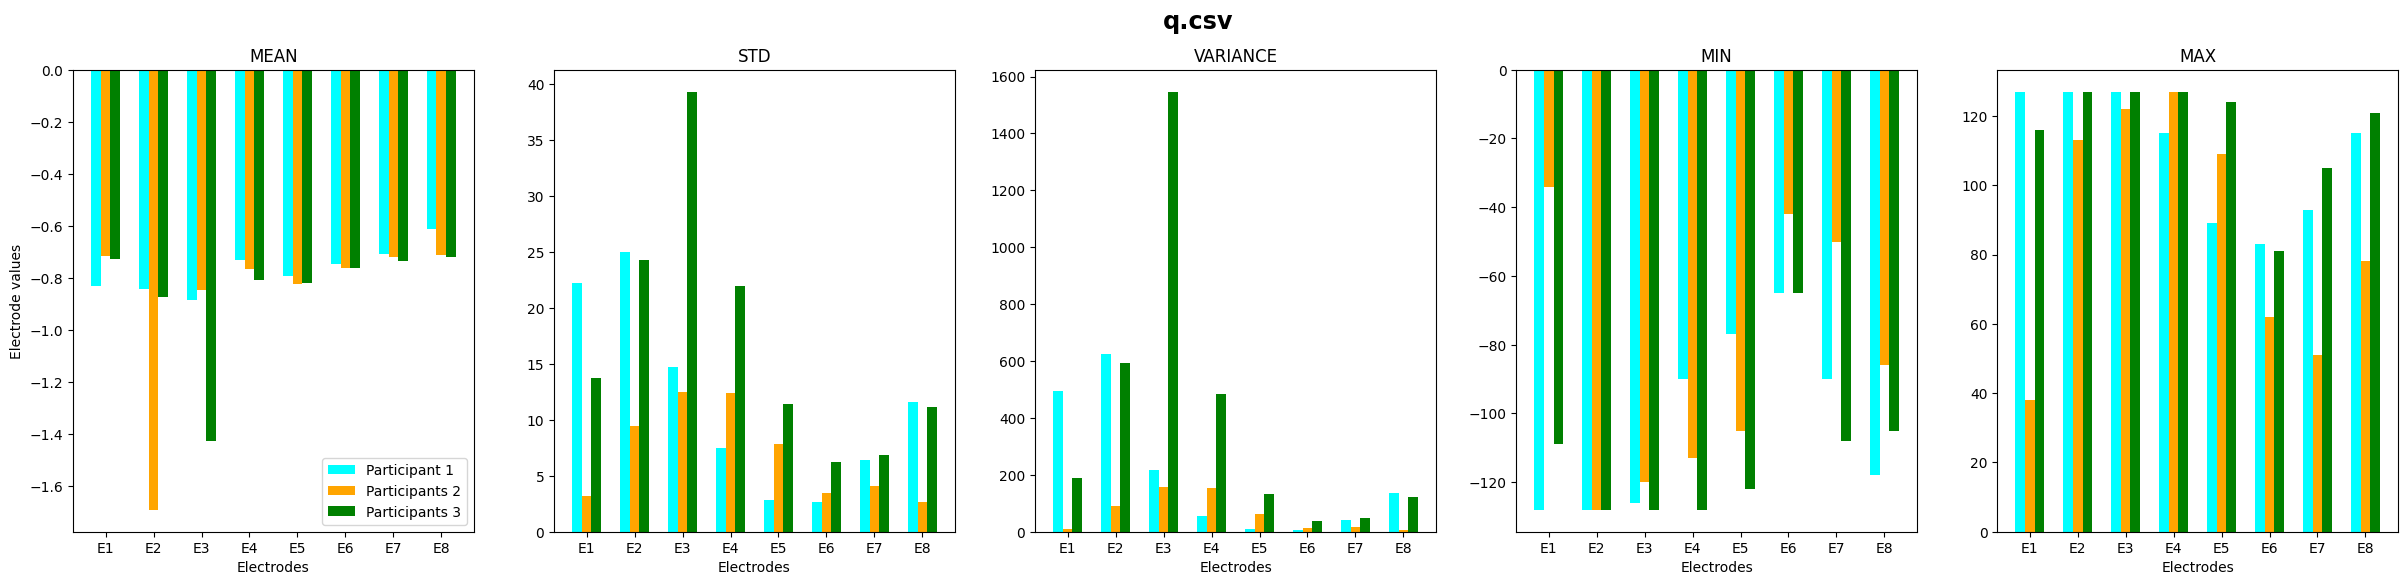

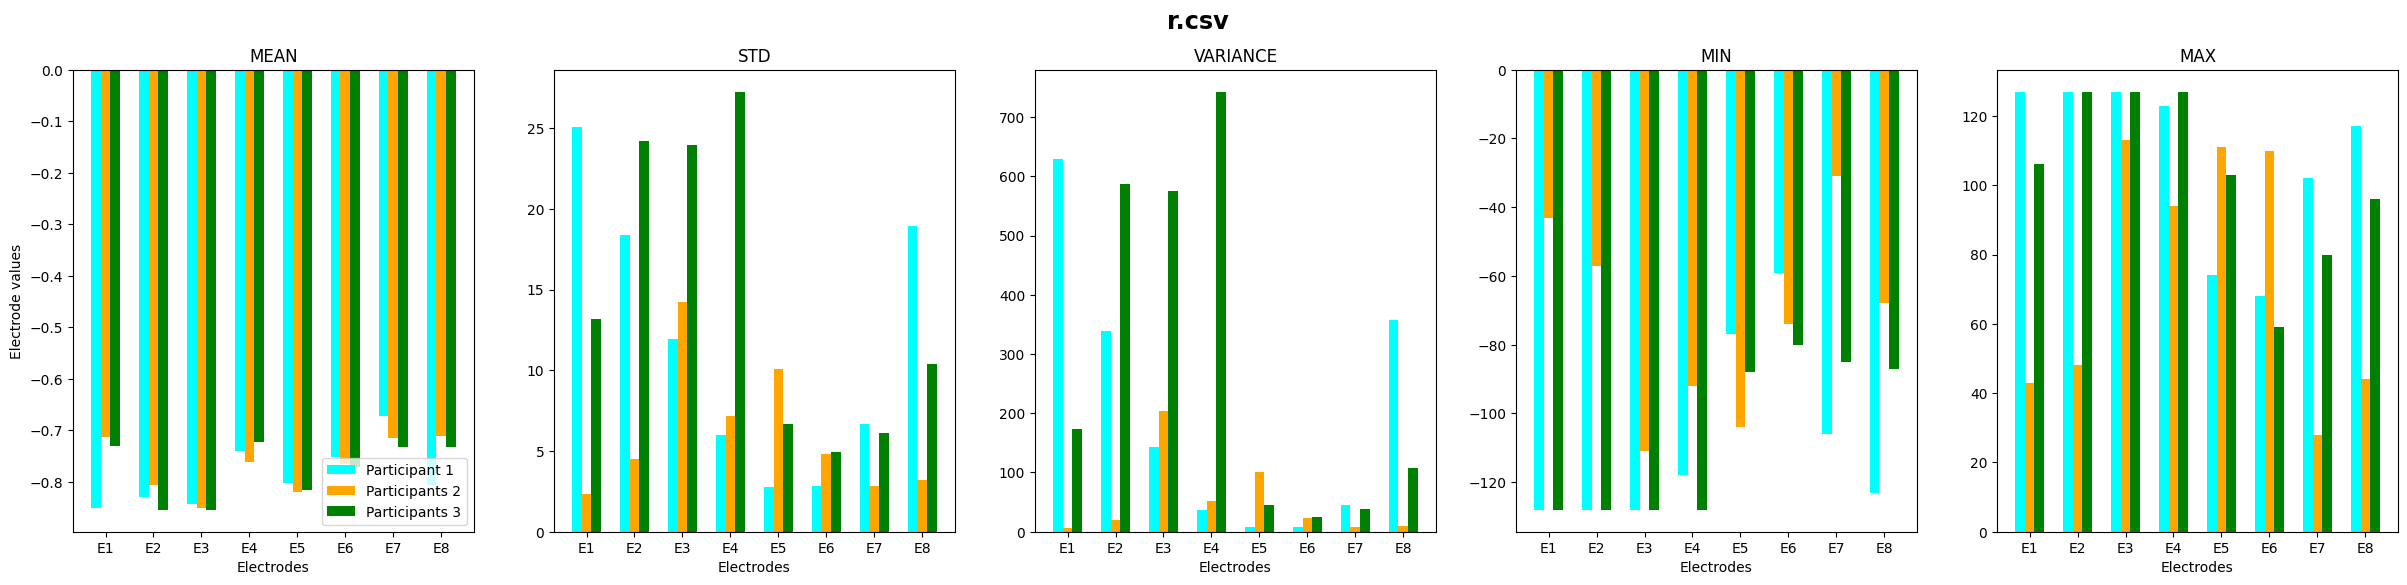

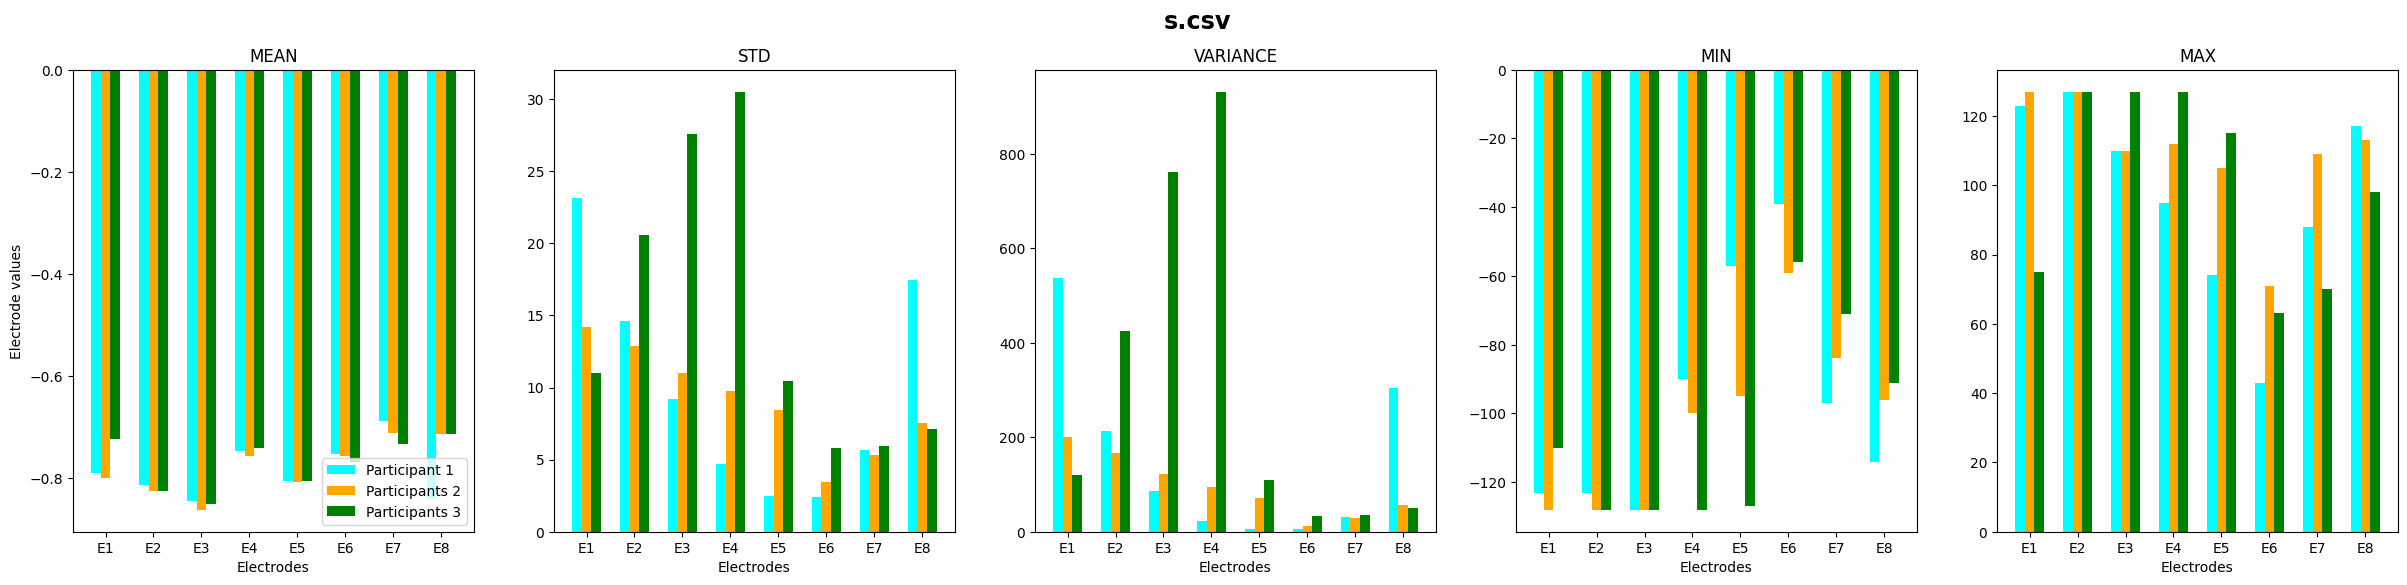

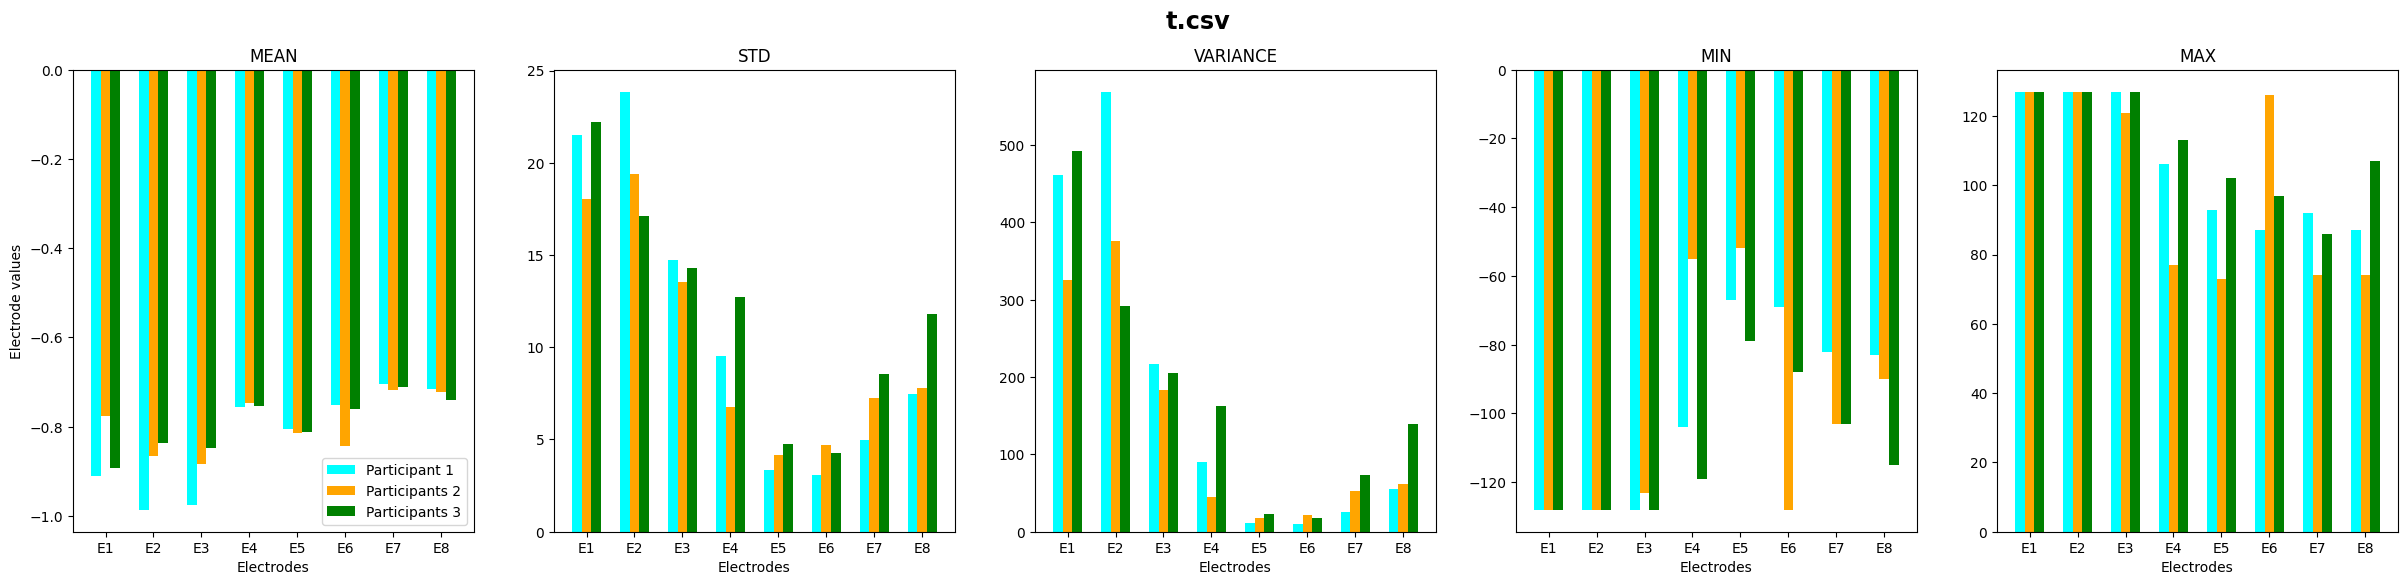

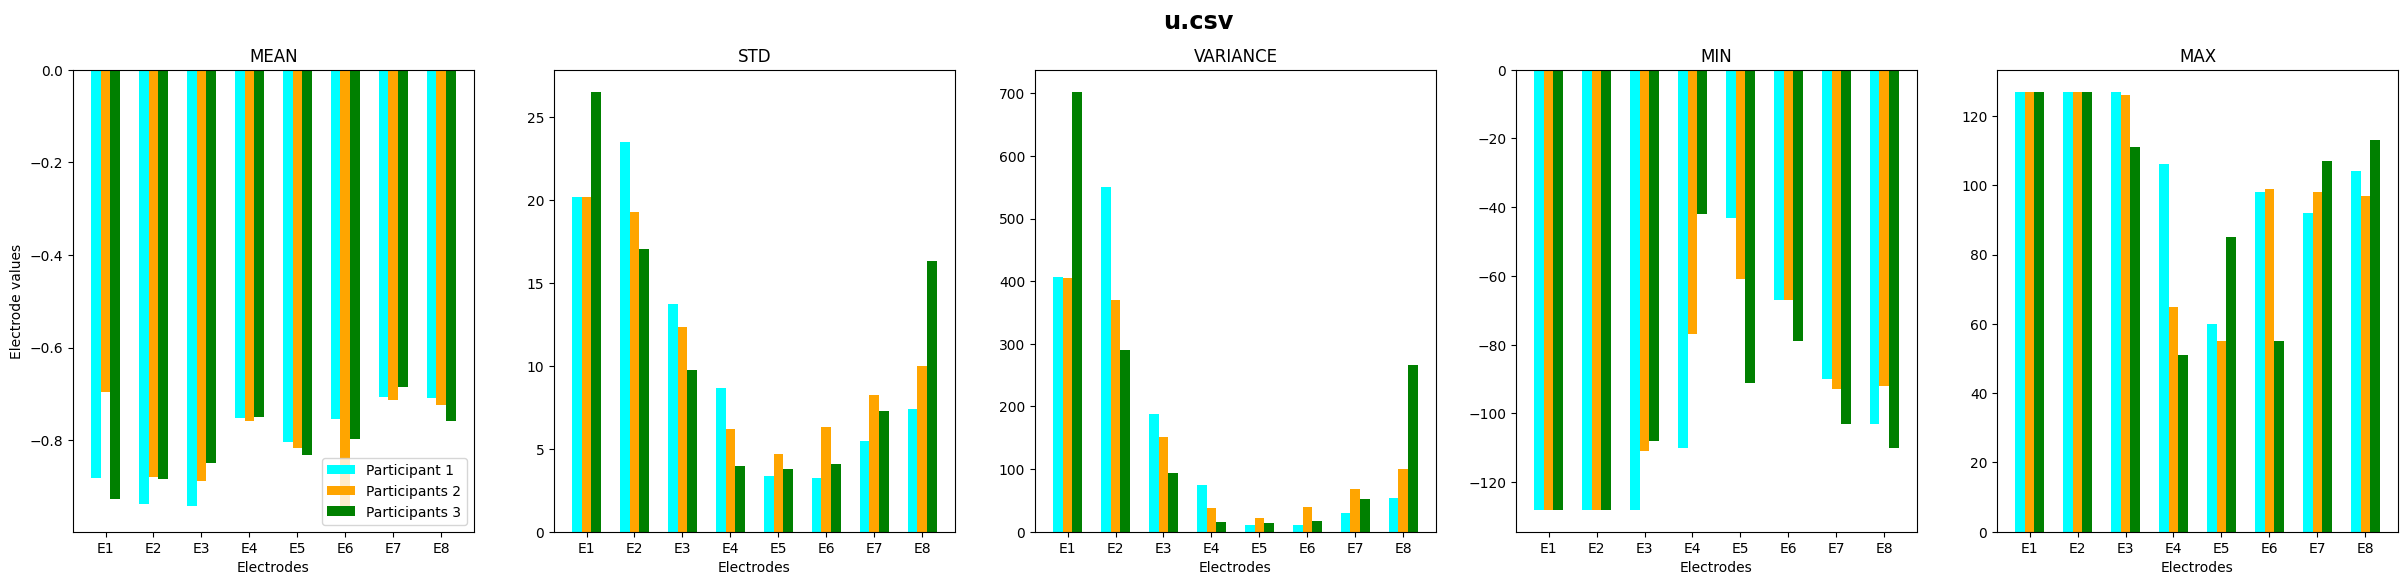

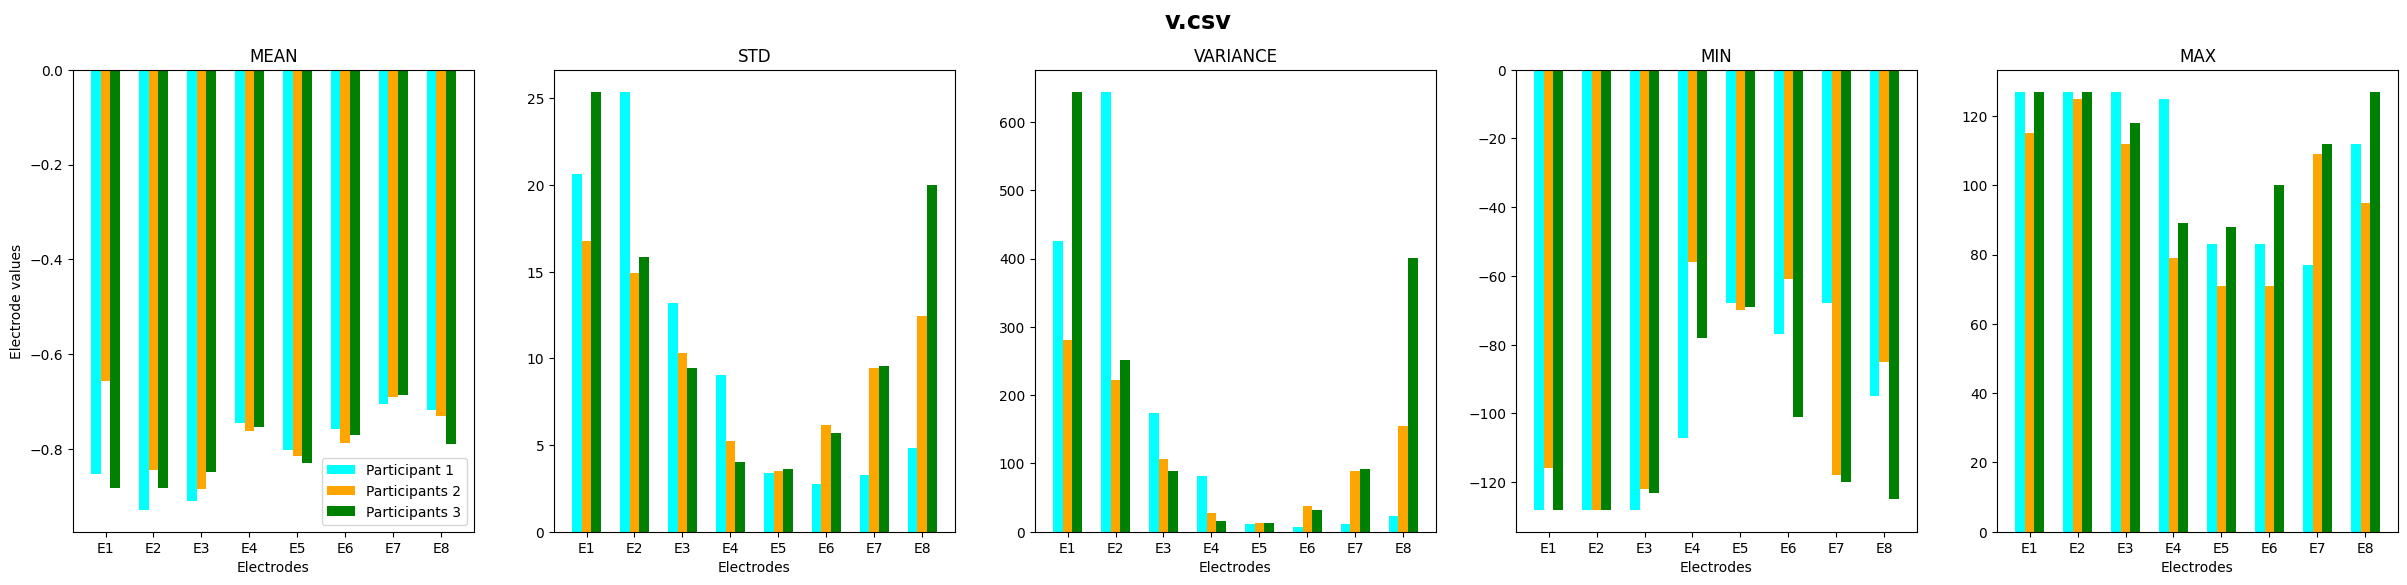

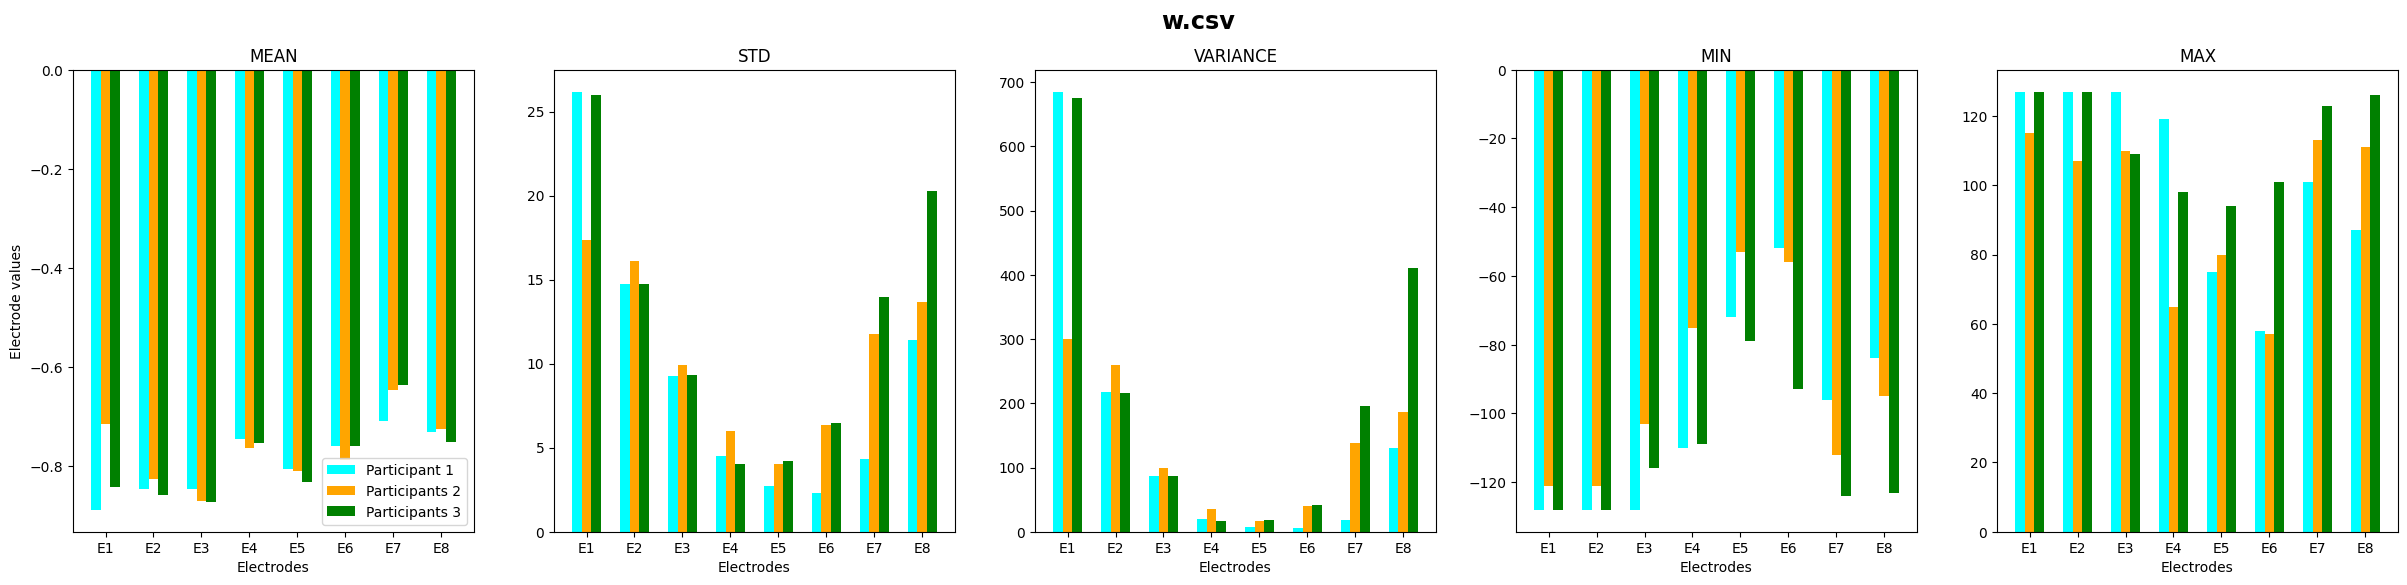

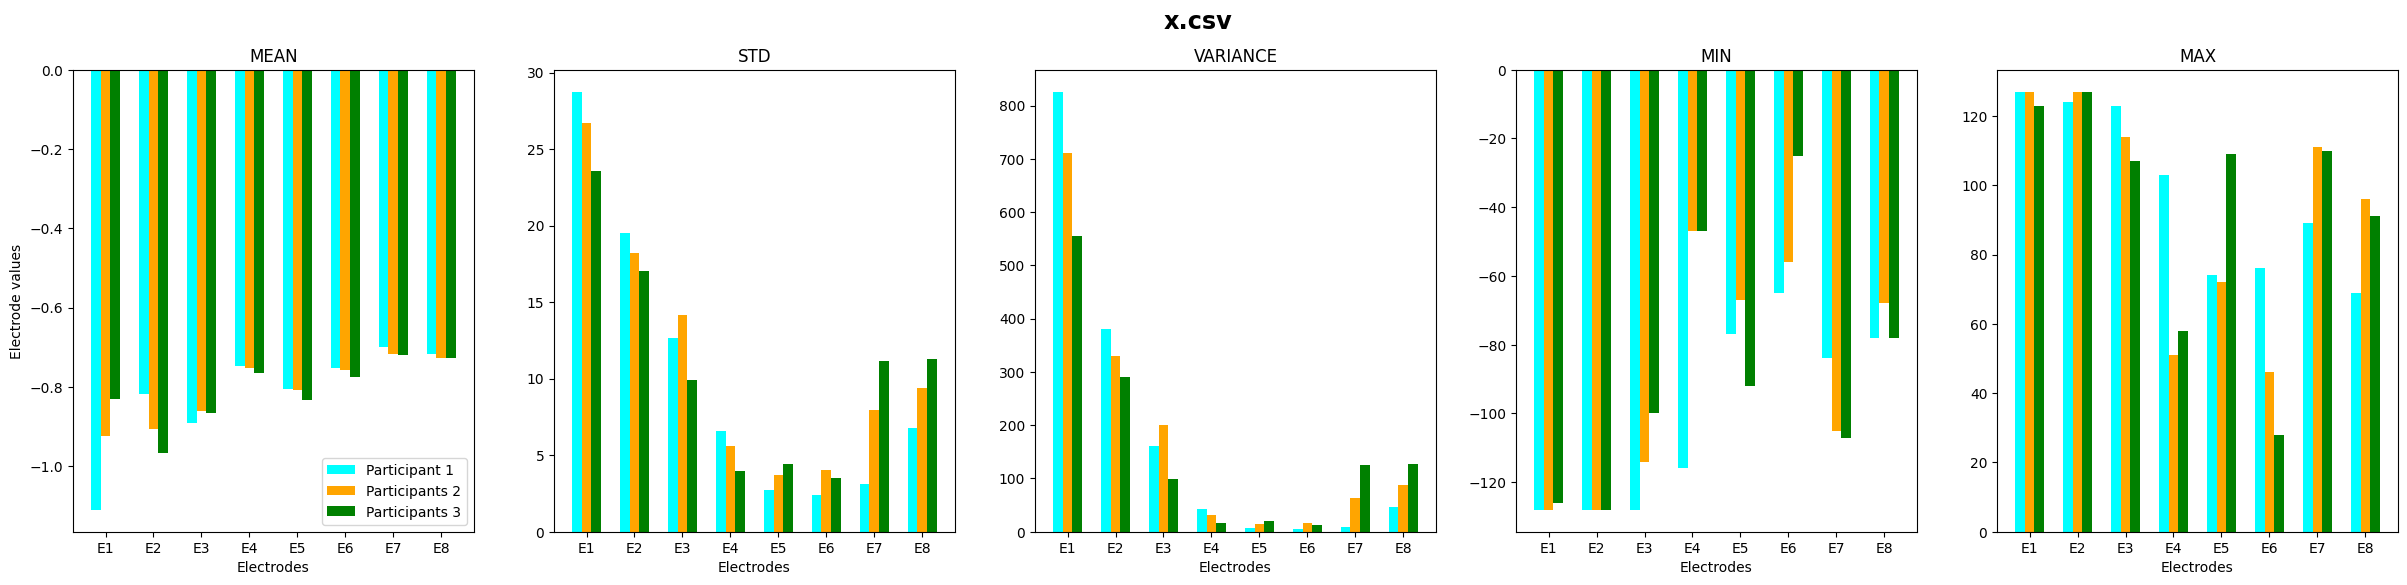

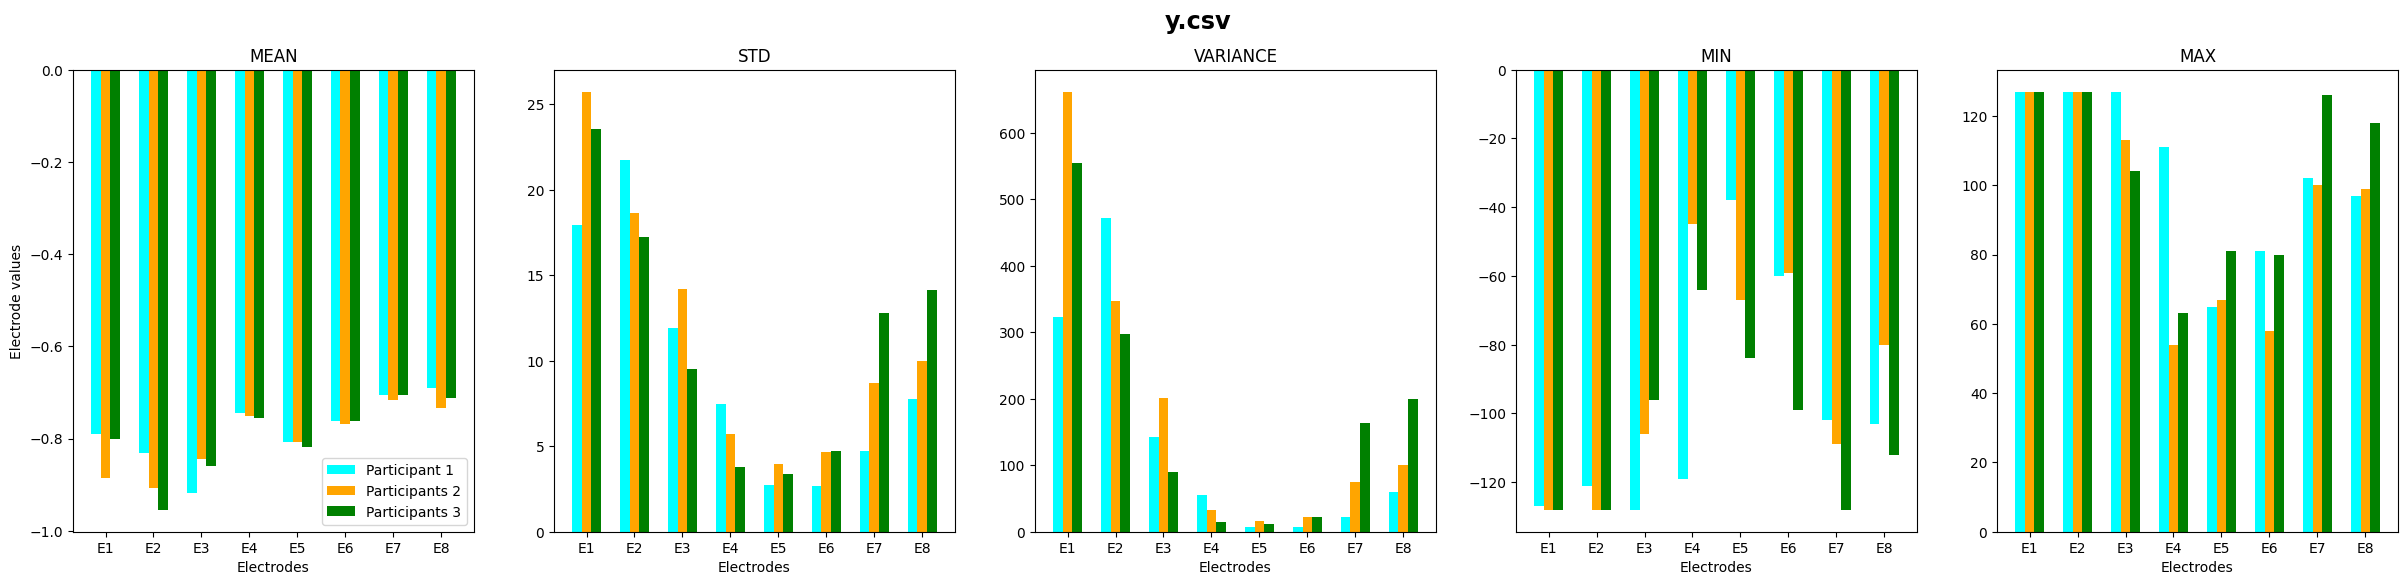

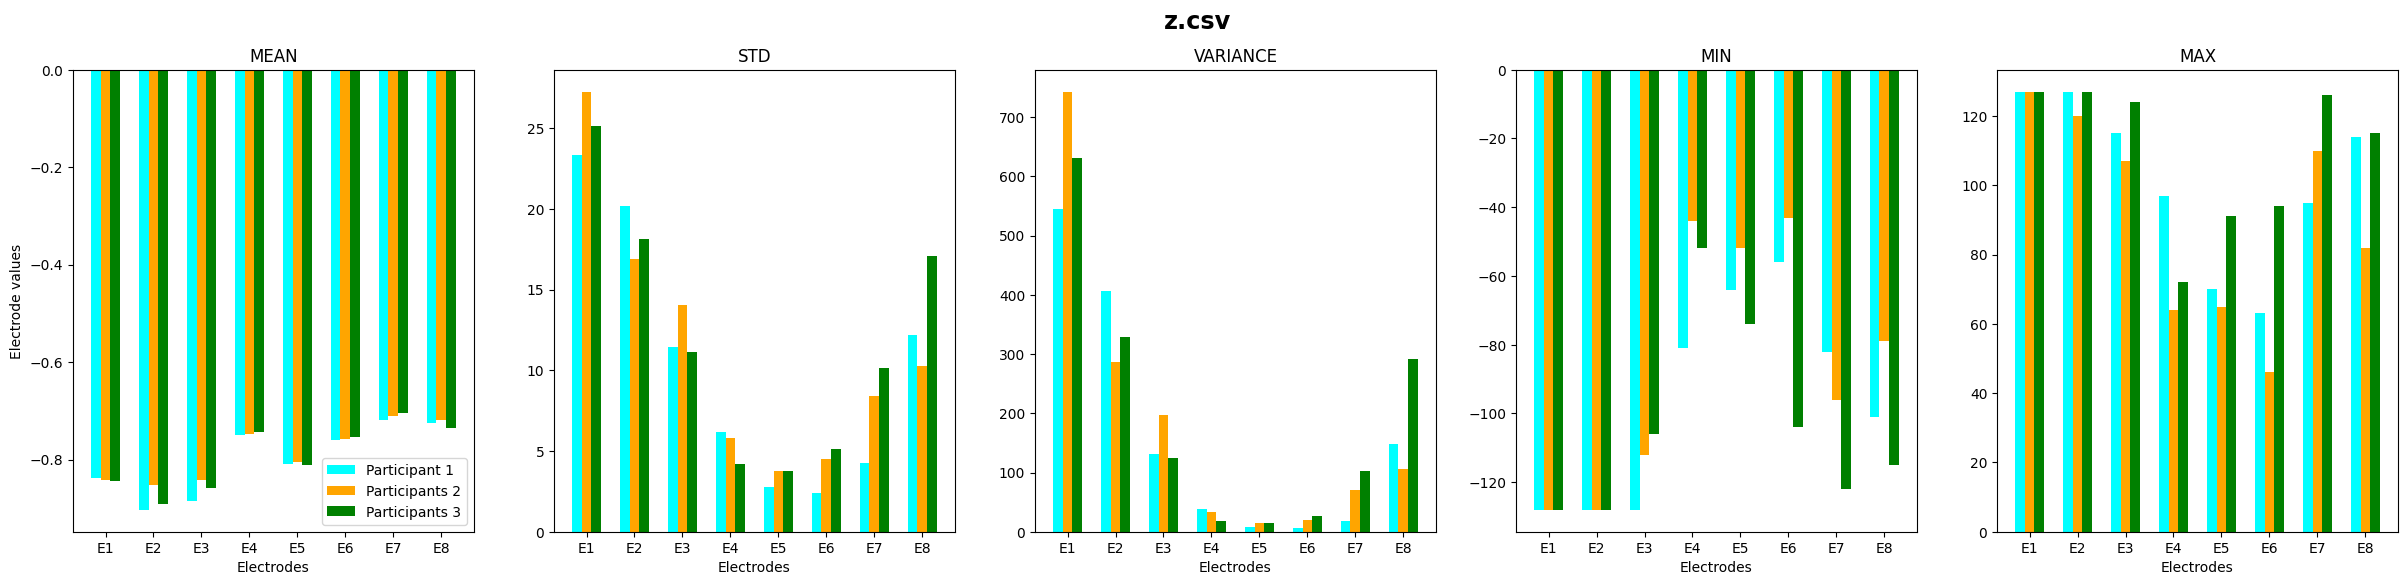

In [111]:
folders = ["0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

for i in folders:
  analyzer(f'/content/ms3sbpbrgp-1/HCMYO-A/data/S01_merged/{i}.csv',
         f'/content/ms3sbpbrgp-1/HCMYO-A/data/S02_merged/{i}.csv',
         f'/content/ms3sbpbrgp-1/HCMYO-A/data/S03_merged/{i}.csv')